# Just Married - Thai Bill OCR - Classifier Experimentation in Python
##### This is just a part of project in Introduction to Machine Learning Class at Sasin University

## Import all preliminary dependencies

In [1]:
import numpy as np # a libary for high-performance multidimensional array and basic tools to compute with and manipulate
import glob #  a library for getting files in path
import cv2 # a library for resizing image
import PIL # a library for image manipulation
import matplotlib # a library to plot basic graphs 
import matplotlib.pyplot as plt # a library to plot basic graphs 
import seaborn as sns # a library for data-visualization

from sklearn import metrics # function to output classification report and confustion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix # function to plot cm
from sklearn.neighbors import KNeighborsClassifier # function to build KNN classifier from scikit-learn
from sklearn.svm import SVC # function to build SVM classifier from scikit-learn
from sklearn.model_selection import train_test_split # splitting function for training and testing
from sklearn.model_selection import cross_val_score, KFold # K-fold cross-validation

# matplotlib configuration
%matplotlib inline
matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'Angsana New',
        'font.size': 22,
        'mathtext.fontset': 'stix',
    }
)

## Instantiating list to hold datapoints and labels

In [2]:
# create an empty list to hold datapoints and labels
X_files = []
y_labels = []

## Instantiating dictionary to iterate through directories and stamp labels

In [3]:
# create a dictionary with key equal to label and value equal to its interpretation
# this dictionary will also be used to loop through our dataset 
labels = {
    0: "ก",
    1: "ข",
    2: "ฃ",
    3: "ค",
    4: "ฅ",
    5: "ฆ",
    6: "ง",
    7: "จ",
    8: "ฉ",
    9: "ช",
    10: "ซ",
    11: "ฌ",
    12: "ญ",
    13: "ฎ",
    14: "ฏ",
    15: "ฐ",
    16: "ฑ",
    17: "ฒ",
    18: "ณ",
    19: "ด",
    20: "ต",
    21: "ถ",
    22: "ท",
    23: "ธ",
    24: "น",
    25: "บ",
    26: "ป",
    27: "ผ",
    28: "ฝ",
    29: "พ",
    30: "ฟ",
    31: "ภ",
    32: "ม",
    33: "ย",
    34: "ร",
    35: "ล",
    36: "ว",
    37: "ศ",
    38: "ษ",
    39: "ส",
    40: "ห",
    41: "ฬ",
    42: "อ",
    43: "ฮ"
}

In [4]:
%%time
## iterates through the dictionary and gets insert into X, y list
for key,value in labels.items():
    path = f"C:\\Users\\chond\\OneDrive\\vst\\mba\\Machine Learning\\project\\thai-ocr\\alice-dataset\\{key}{value}\\*.png"
    files = glob.glob(path)
    for file in files:
        X_files.append(file)
        y_labels.append(key)

Wall time: 197 ms


In [5]:
print(X_files[0:5]) # X top 5
print(X_files[-5:]) # X last 5

['C:\\Users\\chond\\OneDrive\\vst\\mba\\Machine Learning\\project\\thai-ocr\\alice-dataset\\0ก\\0-161-A1-KO KAI-1002.png', 'C:\\Users\\chond\\OneDrive\\vst\\mba\\Machine Learning\\project\\thai-ocr\\alice-dataset\\0ก\\0-161-A1-KO KAI-1004.png', 'C:\\Users\\chond\\OneDrive\\vst\\mba\\Machine Learning\\project\\thai-ocr\\alice-dataset\\0ก\\0-161-A1-KO KAI-1012.png', 'C:\\Users\\chond\\OneDrive\\vst\\mba\\Machine Learning\\project\\thai-ocr\\alice-dataset\\0ก\\0-161-A1-KO KAI-1024.png', 'C:\\Users\\chond\\OneDrive\\vst\\mba\\Machine Learning\\project\\thai-ocr\\alice-dataset\\0ก\\0-161-A1-KO KAI-1027.png']
['C:\\Users\\chond\\OneDrive\\vst\\mba\\Machine Learning\\project\\thai-ocr\\alice-dataset\\43ฮ\\45-206-CE-HO NOKHUK-968.png', 'C:\\Users\\chond\\OneDrive\\vst\\mba\\Machine Learning\\project\\thai-ocr\\alice-dataset\\43ฮ\\45-206-CE-HO NOKHUK-969.png', 'C:\\Users\\chond\\OneDrive\\vst\\mba\\Machine Learning\\project\\thai-ocr\\alice-dataset\\43ฮ\\45-206-CE-HO NOKHUK-970.png', 'C:\\Users

In [6]:
print(y_labels[0:5]) # y top 5
print(y_labels[-5:]) # y last 5

[0, 0, 0, 0, 0]
[43, 43, 43, 43, 43]


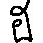

Image format: PNG
Image type: L
Original image size: (30, 30)
First item in the pixel image array: [255 255 255 252 252 252 252 252 252 252   0   0   0   0   0   0 252 252
 252 252 252 252 252 252 252 252 251 255 255 255]
Resized image size: (70, 70)
First item in the resized pixel image array: [255 255 255 255 255 255 255 252 252 252 252 252 252 252 252 252 252 252
 252 252 252 252 252  84   0   0   0   0   0   0   0   0   0   0   0   0
   0 168 252 252 252 252 252 252 252 252 252 252 252 252 252 252 252 252
 252 252 252 252 252 252 252 251 251 255 255 255 255 255 255 255]
Wall time: 91 ms


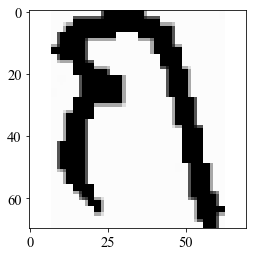

In [7]:
%%time
first_image = PIL.Image.open(X_files[0]) # read an image at the first element of X
last_image = PIL.Image.open(X_files[-1]) # read an image at the last element of X
display(first_image)
display(last_image)
print(f'Image format: {first_image.format}')
print(f'Image type: {first_image.mode}')

image_pixel_arr = np.asarray(first_image) # convert image to pixel array

print(f'Original image size: {image_pixel_arr.shape}')
print(f'First item in the pixel image array: {image_pixel_arr[0]}')

image_pixel_arr = cv2.resize(image_pixel_arr, (70,70), interpolation = cv2.INTER_AREA) # resize image size to 40x40 pixels
print(f'Resized image size: {image_pixel_arr.shape}')
print(f'First item in the resized pixel image array: {image_pixel_arr[0]}')
plt.imshow(image_pixel_arr, cmap='gray')

In [8]:
# confirm pixel range is 0-255
print(f'Data type: {image_pixel_arr.dtype}')
print(f'Min: {image_pixel_arr.min()}, Max: {image_pixel_arr.max()}')

Data type: uint8
Min: 0, Max: 255


## Pixel array normalization

Data type: float64
Min: 0.0, Max: 1.0
Resized image size: (70, 70)
First item in the normalized resized pixel image array: [1.         1.         1.         1.         1.         1.
 1.         0.98823529 0.98823529 0.98823529 0.98823529 0.98823529
 0.98823529 0.98823529 0.98823529 0.98823529 0.98823529 0.98823529
 0.98823529 0.98823529 0.98823529 0.98823529 0.98823529 0.32941176
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.65882353 0.98823529 0.98823529 0.98823529 0.98823529
 0.98823529 0.98823529 0.98823529 0.98823529 0.98823529 0.98823529
 0.98823529 0.98823529 0.98823529 0.98823529 0.98823529 0.98823529
 0.98823529 0.98823529 0.98823529 0.98823529 0.98823529 0.98823529
 0.98823529 0.98431373 0.98431373 1.         1.         1.
 1.         1.         1.         1.        ]
Wall time: 4.28 s


<AxesSubplot:>

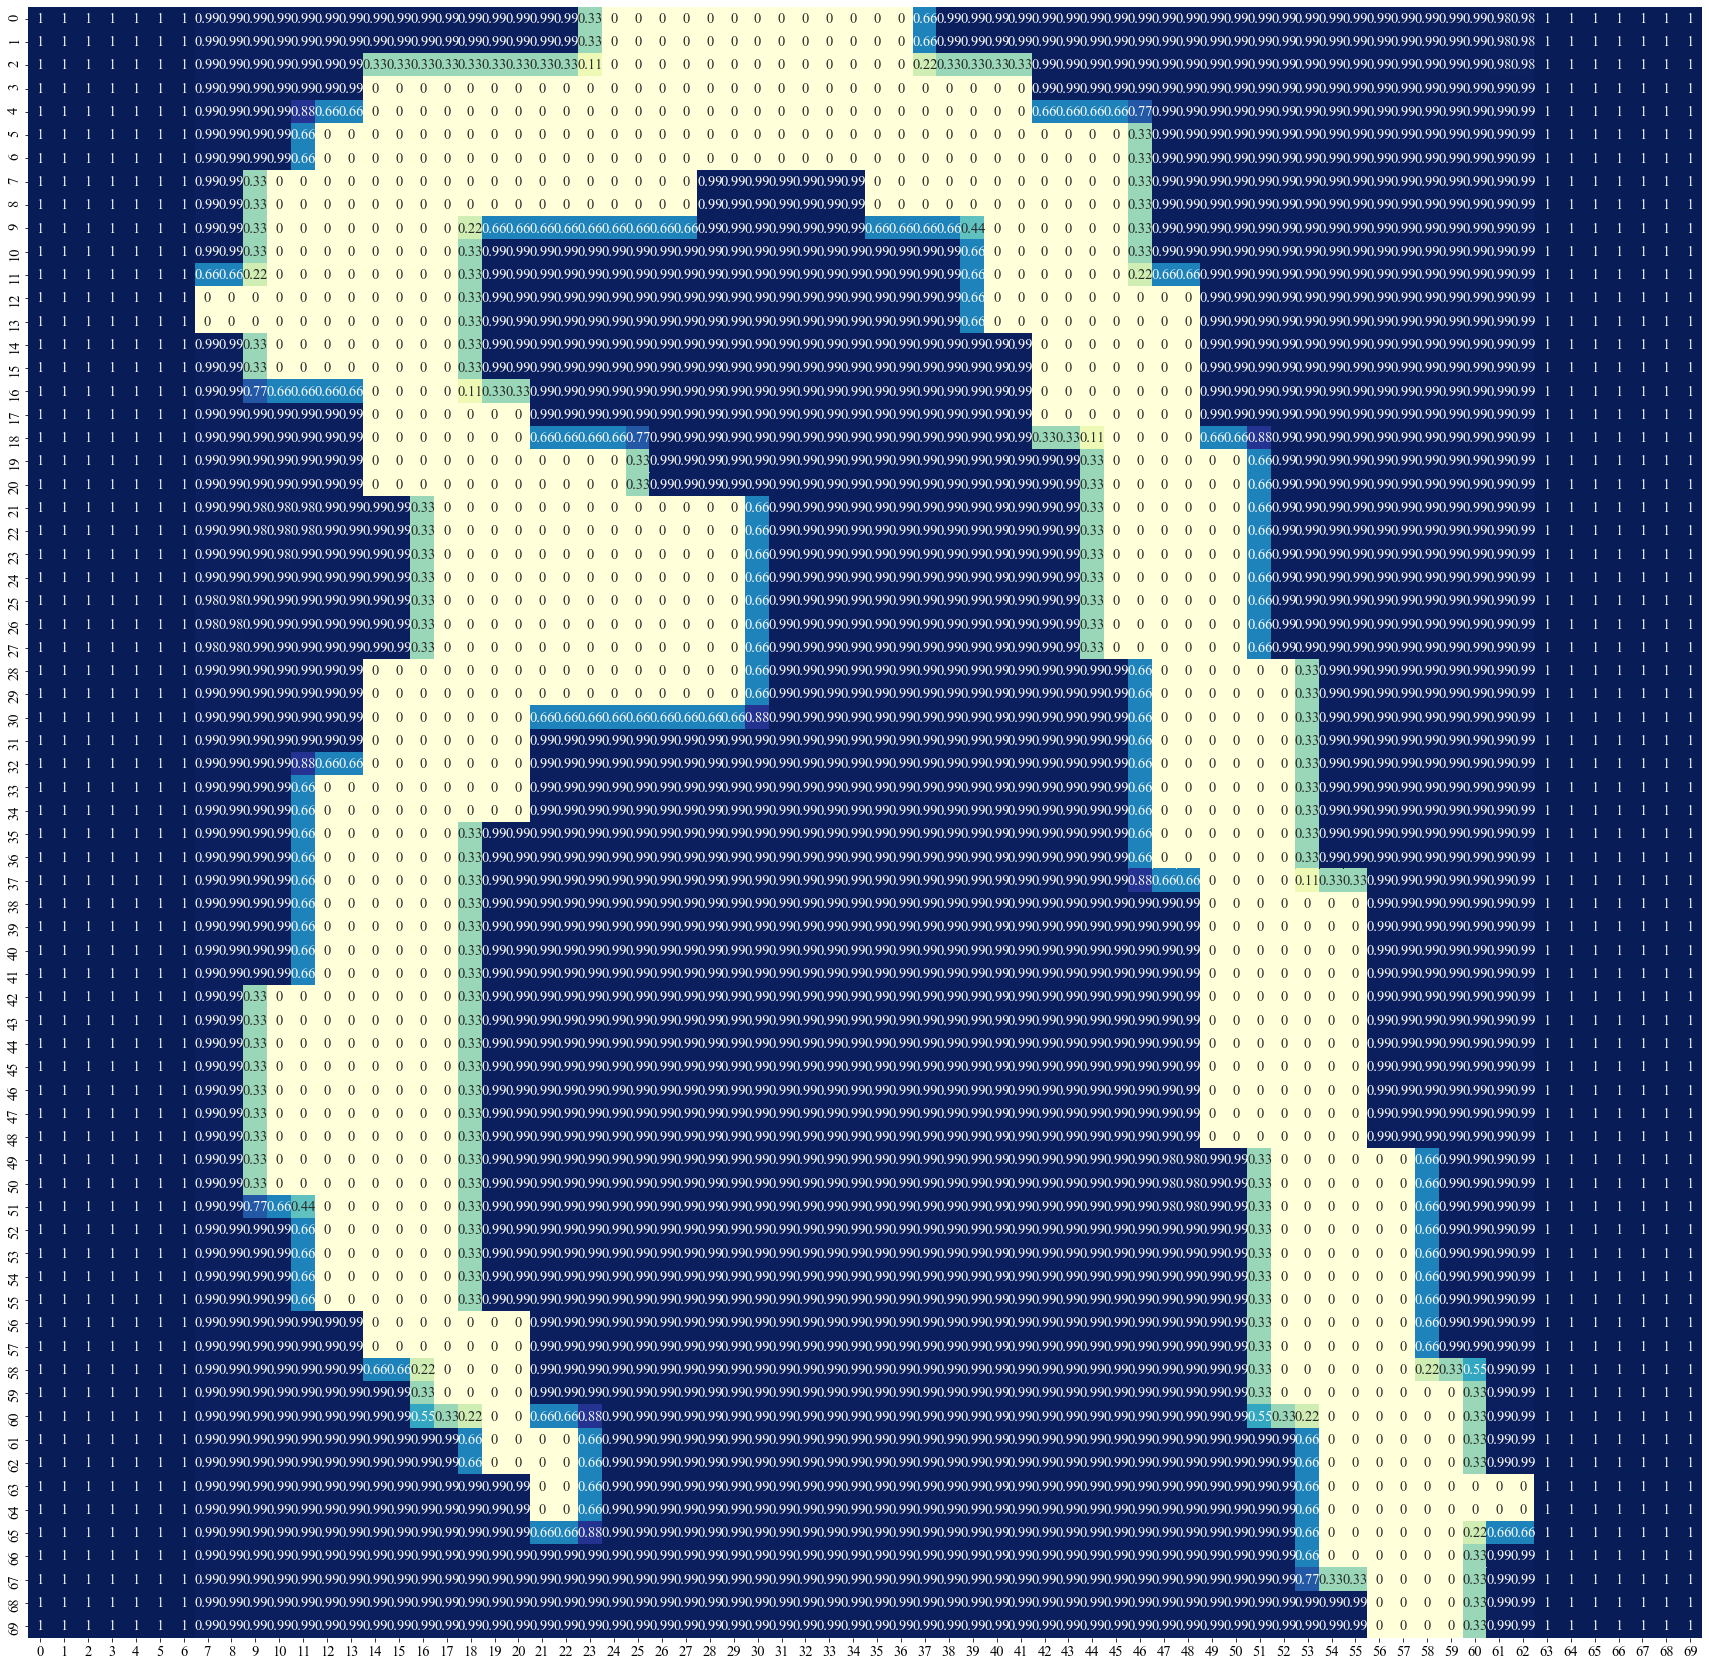

In [9]:
%%time
# normalize and check min max
image_pixel_arr.astype('float64')
normalized_image_pixel_arr = image_pixel_arr / 255.0
print(f'Data type: {normalized_image_pixel_arr.dtype}')
print(f'Min: {normalized_image_pixel_arr.min()}, Max: {normalized_image_pixel_arr.max()}')

print(f'Resized image size: {normalized_image_pixel_arr.shape}')
print(f'First item in the normalized resized pixel image array: {normalized_image_pixel_arr[0]}')

matplotlib.rcParams.update(
    {
        'figure.figsize': [30, 30]
    }
)
sns.heatmap(normalized_image_pixel_arr, annot=True, cmap="YlGnBu", cbar=False)

In [10]:
# array flattening
flatten_normalized_image_pixel_arr = normalized_image_pixel_arr.flatten()
print(f'Flattened shape: {flatten_normalized_image_pixel_arr.shape}')

Flattened shape: (4900,)


## Construction of numpy array datapoints

In [11]:
%%time
# construct numpy array of X's
X_imgs = []
X_imgs = np.array([flatten_normalized_image_pixel_arr])

# iterate through files to create numpy-arrays of flatten normalized image pixel array
for X_file in X_files[1:]:
    image = PIL.Image.open(X_file) # open
    image_pixel_arr = np.asarray(image) # convert image to array
    image_pixel_arr = cv2.resize(image_pixel_arr, (70,70), interpolation = cv2.INTER_AREA) # resize
    image_pixel_arr.astype('float64') # type casting
    normalized_image_pixel_arr = image_pixel_arr / 255.0 # interpolation
    flatten_normalized_image_pixel_arr = normalized_image_pixel_arr.flatten() # flattening
    flatten_normalized_image_pixel_arr = np.array([flatten_normalized_image_pixel_arr]) # convert to numpy array
    X_imgs = np.concatenate((flatten_normalized_image_pixel_arr, X_imgs)) # add item to the list
    
X_imgs = X_imgs[::-1]

Wall time: 38min 57s


In [12]:
y_labels = np.asarray(y_labels)

In [13]:
# Confirm X and y shapes
print(X_imgs.shape)
print(y_labels.shape)
print(X_imgs[0])

(9361, 4900)
(9361,)
[1. 1. 1. ... 1. 1. 1.]


In [14]:
# print image helper function
def print_img(image_pixel_arr, labels, top_n):
    fig = plt.figure(figsize=(70,70))
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
    for i in range(top_n):
        p = fig.add_subplot(70,70,i+1,xticks=[],yticks=[])
        p.imshow(image_pixel_arr[i].reshape((70,70)),cmap=plt.cm.bone)
        p.text(0,80,f'label: {str(labels[i])}')
        p.text(0,90,str(f'#: {i}'))

Wall time: 736 ms


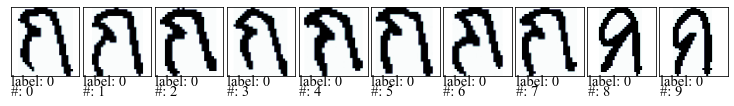

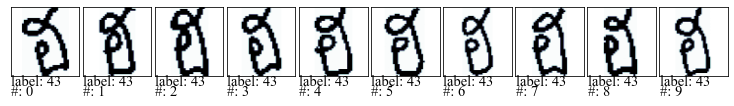

In [15]:
%%time
print_img(X_imgs, y_labels, 10)
print_img(X_imgs[-11:], y_labels[-11:], 10)

## Histogram Plot of datapoints

Wall time: 10.4 s


[Text(0.5, 0, 'Intensity'), Text(0, 0.5, 'Count')]

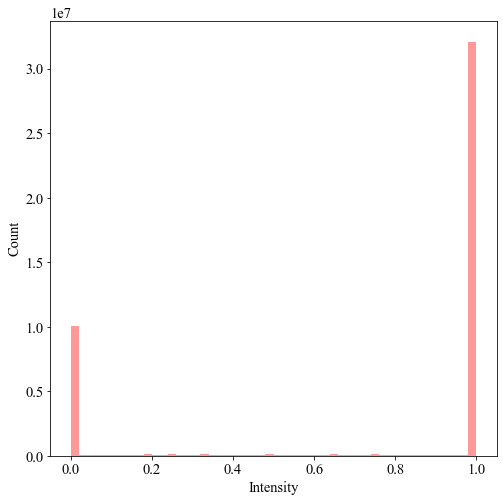

In [16]:
%%time
# intensity histogram
matplotlib.rcParams.update(
    {
        'figure.figsize': [8, 8]
    }
)
intensity_dist = sns.distplot(X_imgs.flatten(), kde=False, color='red')
intensity_dist.set(xlabel='Intensity', ylabel='Count')

## K-Fold Cross Validation Dataset Preparation 7:2:1

In [17]:
%%time
# hold-out for test only
X_train, X_test, y_train, y_test = train_test_split(X_imgs, y_labels, test_size=0.3, random_state=101)
X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, test_size=0.66, random_state=101) 
# check number of items in each cvt sets
print(f'Number of datapoints in training set: {len(X_train)}')
print(f'Number of datapoints in validation set: {len(X_cv)}')
print(f'Number of datapoints in testing set: {len(X_test)}')
print(f'Total number of datapoints: {len(X_train) + len(X_cv) + len(X_test)}')

Number of datapoints in training set: 6552
Number of datapoints in validation set: 1854
Number of datapoints in testing set: 955
Total number of datapoints: 9361
Wall time: 530 ms


(8406, 4900)
(8406,)
Wall time: 1.35 s


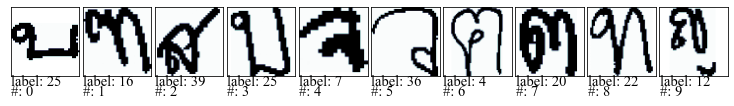

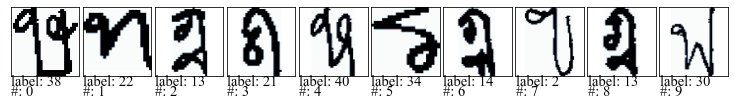

In [18]:
%%time
X_train_cv = np.concatenate([X_train, X_cv], axis=0)
y_train_cv = np.concatenate([y_train, y_cv], axis=0)
print(X_train_cv.shape)
print(y_train_cv.shape)
print_img(X_train_cv, y_train_cv, 10)
print_img(X_train_cv[-11:], y_train_cv[-11:], 10)

## K Parameter Tuning for KNN Classifier 

In [19]:
# knn classifier
knn_clf = KNeighborsClassifier(n_neighbors=1)

In [20]:
%%time
# parameter tuning: search for optimal K for KNN
k_range = range(1,11)
k_scores = []
for k in k_range:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_clf, X_train_cv, y_train_cv, cv=5, scoring='accuracy')
    k_scores.append(np.mean(scores))
print(k_scores)

[0.9289785608334317, 0.8954313474865268, 0.9141087244229944, 0.9028068480272982, 0.9055435973576115, 0.898762414931942, 0.8962648924363436, 0.8894839222166183, 0.883773813927925]
Wall time: 1h 29min 48s


Maximum accuracy at K=1 with value 0.9289785608334317
Wall time: 90.8 ms


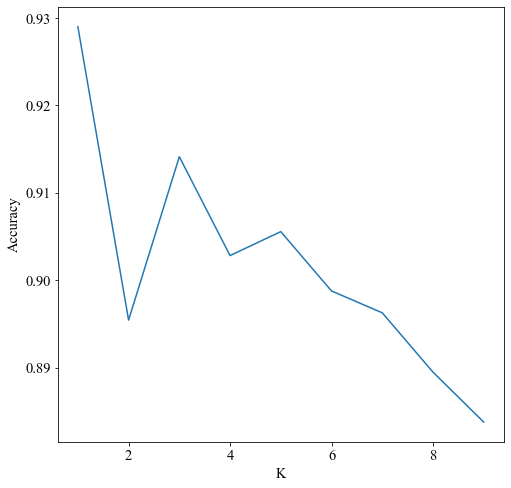

In [21]:
%%time
k_lineplot = sns.lineplot(x=k_range,y=k_scores)
k_lineplot.set(xlabel='K', ylabel='Accuracy')
print(f'Maximum accuracy at K={len(k_scores) - k_scores[::-1].index(max(k_scores))} with value {max(k_scores)}')

## SVM Classifier

In [22]:
# svm classifier
svm_clf = SVC(kernel='linear', C=1, probability=True) # linear kernel

## KNN CV Accuracy

In [23]:
%%time
# cross validation method for accuracy validation
# slower than train-test K times
# stratified by default
# cross_val_score function take care of splitting data into folds, no need train-test-split
print('KNN Cross Validation:')
knn_scores = cross_val_score(knn_clf, X_train_cv, y_train_cv, cv=5, scoring='accuracy')
print(knn_scores)
print(f"Mean score/Cross validated accuracy : {np.mean(knn_scores)} SD: {np.std(knn_scores)}")

KNN Cross Validation:
[0.88109394 0.88756692 0.88637716 0.88280785 0.8810232 ]
Mean score/Cross validated accuracy : 0.883773813927925 SD: 0.0027146190331061673
Wall time: 8min 44s


## SVM CV Accuracy

In [24]:
%%time
# K Fold = 10 is generally recommended
print('SVM Cross Validation:')
svm_scores = cross_val_score(svm_clf, X_train_cv, y_train_cv, cv=5, scoring='accuracy')
print(svm_scores)
print(f"Mean score/Cross validated accuracy : {np.mean(svm_scores)} SD: {np.std(svm_scores)}")

SVM Cross Validation:
[0.92806183 0.93039857 0.90243902 0.92088043 0.9107674 ]
Mean score/Cross validated accuracy : 0.9185094512990893 SD: 0.010549110525368109
Wall time: 1h 47min 41s


## KNN Training

In [25]:
%%time
# train knn
knn_clf.fit(X_train, y_train)
# predict knn
y_pred_knn = knn_clf.predict(X_test)

Wall time: 1min 5s


## KNN Classification Report and Confusion Matrix

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.96      0.81        25
           1       0.86      0.75      0.80        24
           2       0.81      0.92      0.86        24
           3       0.82      0.82      0.82        28
           4       0.61      0.92      0.73        12
           5       1.00      0.95      0.97        20
           6       0.87      1.00      0.93        20
           7       0.90      0.93      0.91        28
           8       1.00      0.88      0.93        24
           9       0.64      0.84      0.73        19
          10       0.86      0.73      0.79        26
          11       0.83      1.00      0.91        20
          12       1.00      0.86      0.92        21
          13       0.89      0.89      0.89        19
          14       0.94      0.84      0.89        19
          15       1.00      0.93      0.97        15
          16       0.88      0.85      0.86        26


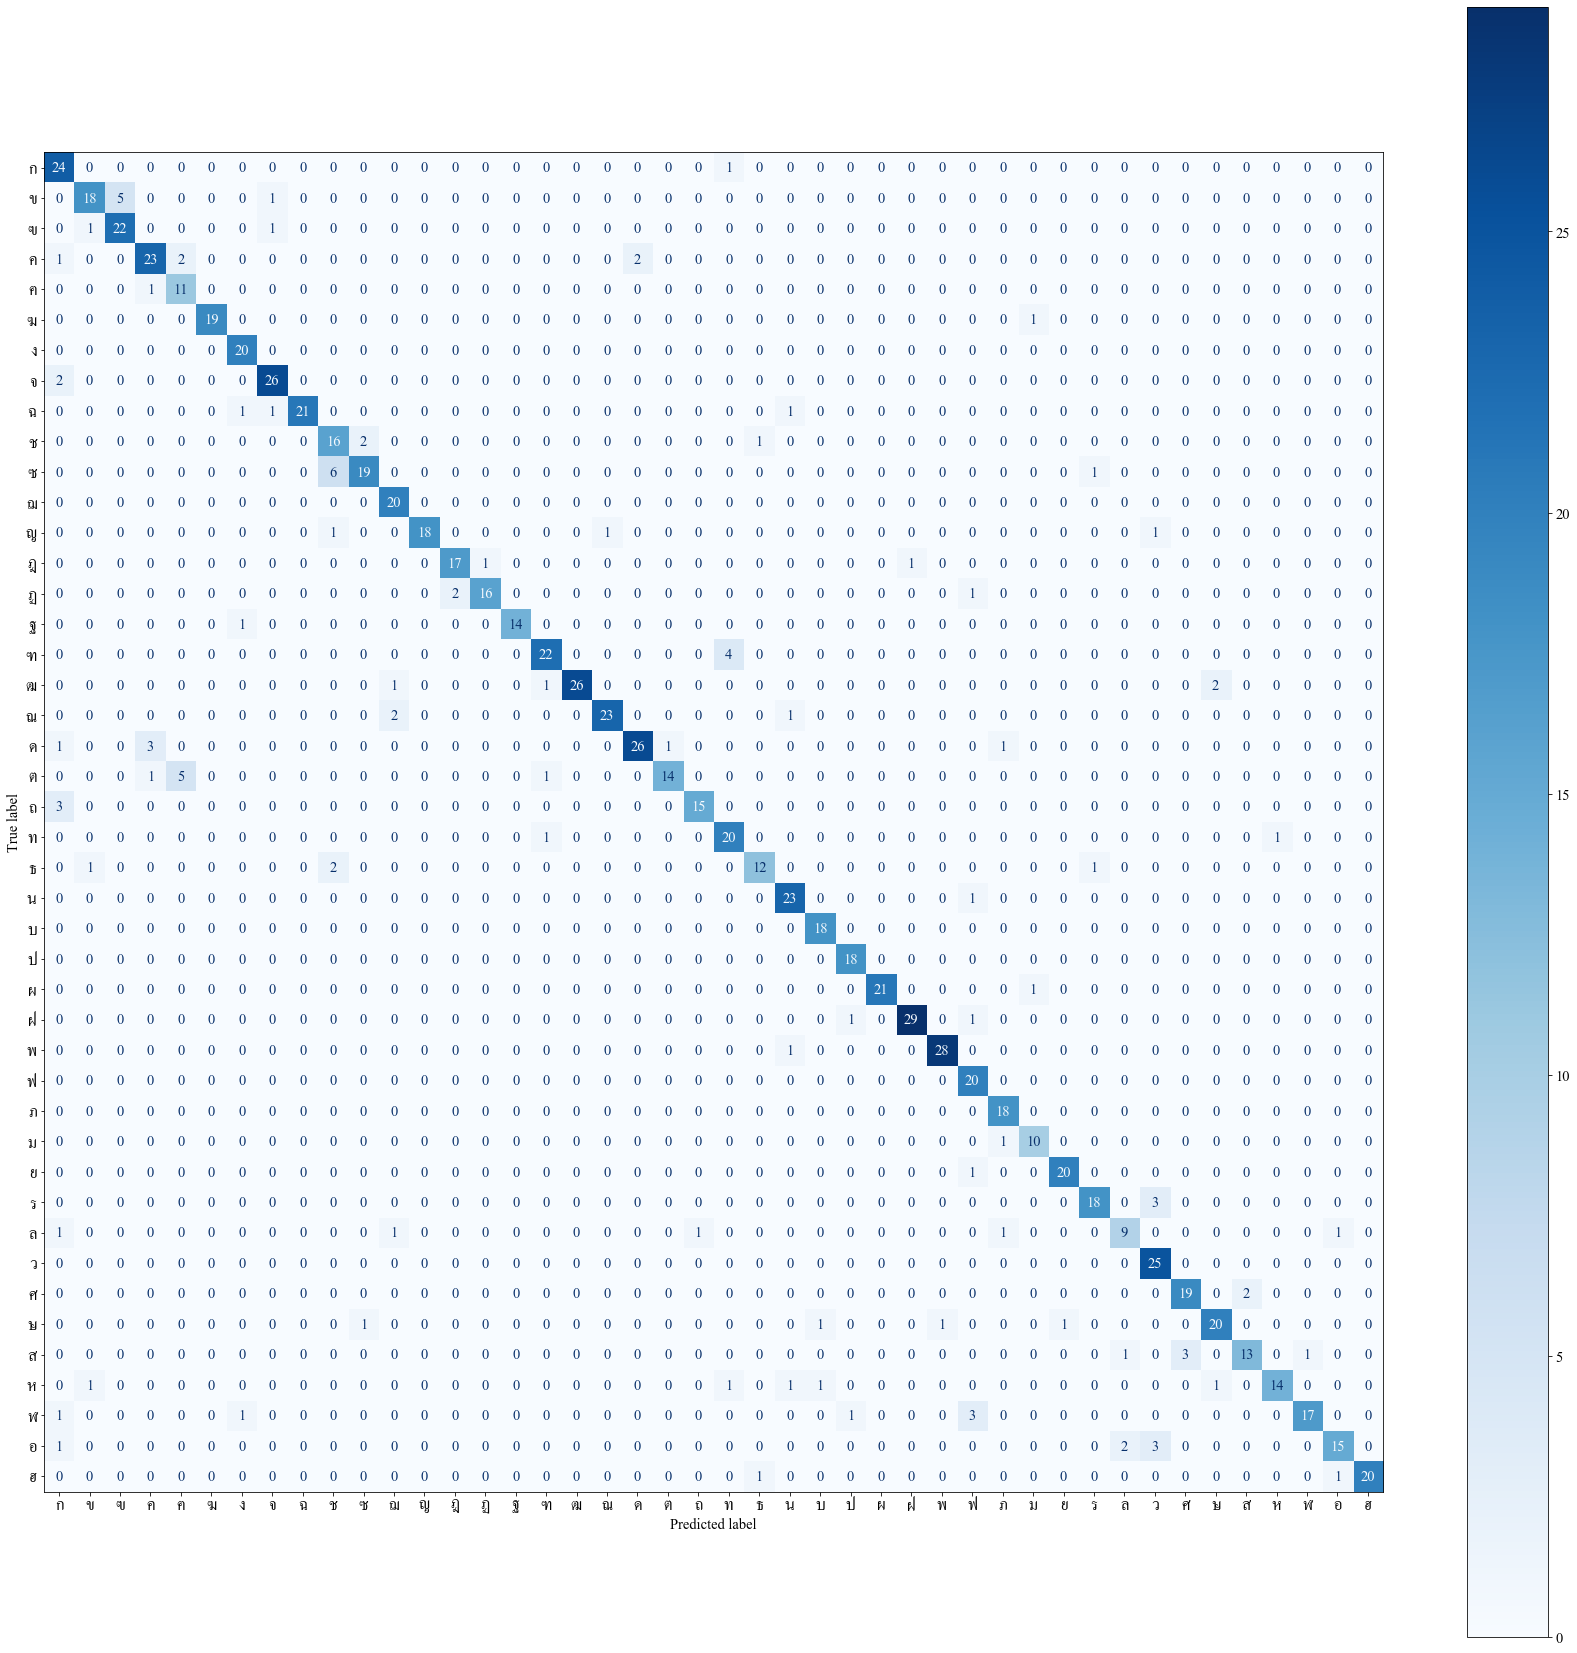

In [48]:
matplotlib.rcParams.update(
    {
        'figure.figsize': [30, 30]
    }
)

print('KNN Classification Report:')
print(metrics.classification_report(y_test, y_pred_knn))
print('KNN Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_pred_knn))
plot_confusion_matrix(knn_clf, X_test, y_test, display_labels=labels.values(), cmap=plt.cm.Blues)

## KNN FP (vertical), FN (horizontal) Image Check

Wall time: 183 ms


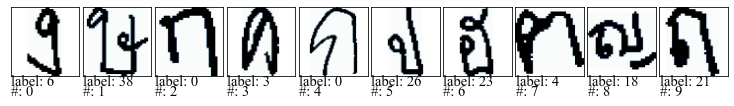

In [114]:
%%time
print_img(X_test[40:], y_pred_knn[40:], 10) # Actual ฮ-43 predicted ธ-23 FN of ฮ 

## SVM Training

In [28]:
%%time
# train svm
svm_clf.fit(X_train, y_train)
# predict svm
y_pred_svm = svm_clf.predict(X_test)

Wall time: 12min 2s


## SVM Classification Report and Confusion Matrix

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        25
           1       0.81      0.88      0.84        24
           2       0.91      0.88      0.89        24
           3       0.89      0.89      0.89        28
           4       0.79      0.92      0.85        12
           5       1.00      0.95      0.97        20
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        28
           8       0.96      0.92      0.94        24
           9       0.52      0.89      0.65        19
          10       0.70      0.54      0.61        26
          11       0.95      1.00      0.98        20
          12       1.00      0.86      0.92        21
          13       0.95      0.95      0.95        19
          14       0.89      0.89      0.89        19
          15       0.88      0.93      0.90        15
          16       0.91      0.77      0.83        26


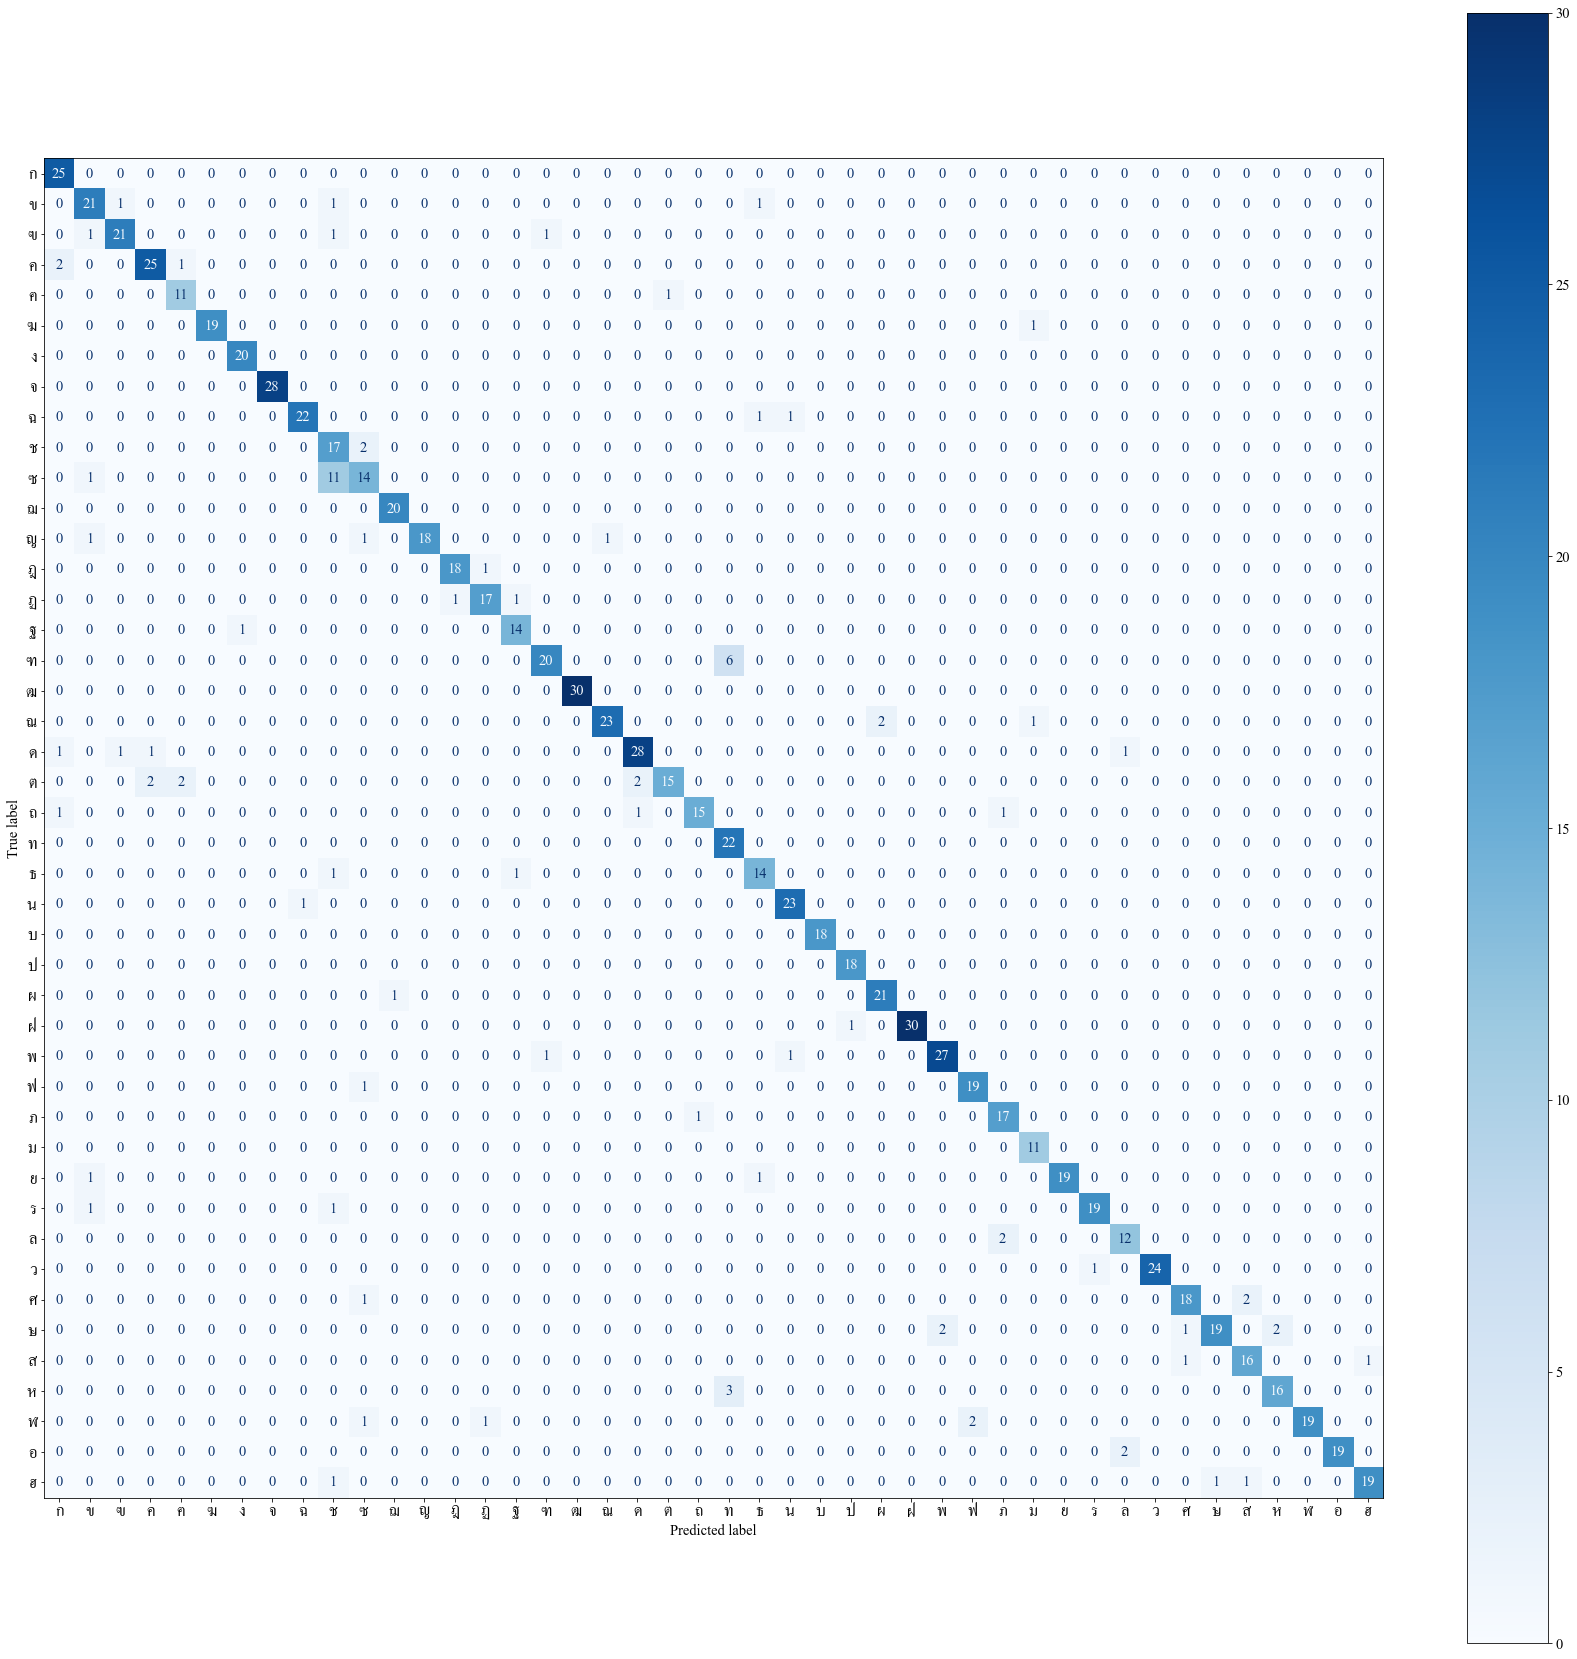

In [49]:
print('SVM Classification Report:')
print(metrics.classification_report(y_test, y_pred_svm))
print('SVM Confusion Matrix:')
plot_confusion_matrix(svm_clf, X_test, y_test, display_labels=labels.values(), cmap=plt.cm.Blues)

## SVM FP (vertical), FN (horizontal) Image Check

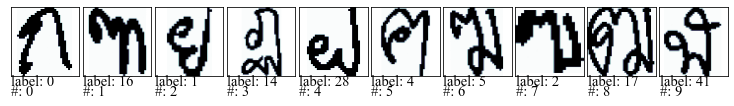

In [121]:
print_img(X_test[80:], y_pred_svm[80:], 10) # Actual ย-33 predicted ข-1 FP of ข 

## Real World Data Test

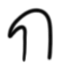

Image format: PNG
Image type: L
Our image size: (70, 70)
First item in our image array: [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
Data type: float64
Min: 0.00784313725490196, Max: 1.0
First item in our normalized image array: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Wall time: 4.99 ms


In [50]:
%%time
# self hand-written
our_image_path = r'C:\Users\chond\OneDrive\vst\mba\Machine Learning\project\thai-ocr\self-hand-written-dataset\ko-kai-taro-0.png'

our_image = PIL.Image.open(our_image_path)
display(our_image)
print(f'Image format: {our_image.format}')
print(f'Image type: {our_image.mode}')

our_image_pixel_arr = np.asarray(our_image) # convert image to pixel array

print(f'Our image size: {our_image_pixel_arr.shape}')
print(f'First item in our image array: {our_image_pixel_arr[0]}')

# normalize and check min max
our_image_pixel_arr.astype('float64')
normalized_our_image_pixel_arr = our_image_pixel_arr / 255.0
print(f'Data type: {normalized_our_image_pixel_arr.dtype}')
print(f'Min: {normalized_our_image_pixel_arr.min()}, Max: {normalized_our_image_pixel_arr.max()}')
print(f'First item in our normalized image array: {normalized_our_image_pixel_arr[0]}')

# flatten
flatten_our_normalized_image_pixel_arr = normalized_our_image_pixel_arr.flatten()

In [51]:
%%time
# predict our data with knn 
y_pred_knn_our = knn_clf.predict([flatten_our_normalized_image_pixel_arr])
print(y_pred_knn_our)

# predict our data with svm 
y_pred_svm_our = svm_clf.predict([flatten_our_normalized_image_pixel_arr])
print(y_pred_svm_our)
print(svm_clf.predict_proba([flatten_our_normalized_image_pixel_arr]))

[0]
[10]
[[0.09010425 0.01194309 0.02087002 0.00988777 0.01104907 0.00805199
  0.01177861 0.0107871  0.05047373 0.01948958 0.12010413 0.00299425
  0.02197347 0.00811479 0.0039478  0.00573225 0.01192266 0.01424111
  0.01176905 0.00714103 0.00965296 0.02053089 0.01274643 0.01173741
  0.01017605 0.00699474 0.01922641 0.01758129 0.03620975 0.01007519
  0.05436309 0.01587429 0.00555568 0.01940864 0.02157205 0.01144432
  0.01239848 0.03989952 0.03409241 0.03661935 0.00763558 0.07835282
  0.0049948  0.05048211]]
Wall time: 180 ms


## Neural Network

## Getting all Dependencies (Tensorflow, Keras)

In [57]:
# tensorflow is an open-source framework to build NN classifier
# keras is a python deep-learning library
# underhood is a C++ engine to accelerate code execution
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from mlxtend.plotting import plot_confusion_matrix as pcm

In [58]:
# tensorflow config
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [52]:
%%time
# Current shape of datapoints
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_cv: {X_cv.shape}')
print(f'Shape of y_cv: {y_cv.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

X_train_reshape = []
X_cv_reshape = []
X_test_reshape = []

# Reshape X and y
for x_train in X_train:
    X_train_reshape.append(x_train.reshape(70,70))
X_train_reshape = np.asarray(X_train_reshape)

for x_cv in X_cv:
    X_cv_reshape.append(x_cv.reshape(70,70))
X_cv_reshape = np.asarray(X_cv_reshape)

for x_test in X_test:
    X_test_reshape.append(x_test.reshape(70,70))
X_test_reshape = np.asarray(X_test_reshape)

y_train_reshape = y_train.reshape(-1,1)
y_cv_reshape = y_cv.reshape(-1,1)
y_test_reshape = y_test.reshape(-1,1)

print(f'Shape of X_train after reshape: {X_train_reshape.shape}')
print(f'Shape of y_train after reshape: {y_train_reshape.shape}')
print(f'Shape of X_cv after reshape: {X_cv_reshape.shape}')
print(f'Shape of y_cv after reshape: {y_cv_reshape.shape}')
print(f'Shape of X_test after reshape: {X_test_reshape.shape}')
print(f'Shape of y_test after reshape: {y_test_reshape.shape}')

Shape of X_train: (6552, 4900)
Shape of y_train: (6552,)
Shape of X_cv: (1854, 4900)
Shape of y_cv: (1854,)
Shape of X_test: (955, 4900)
Shape of y_test: (955,)
Shape of X_train after reshape: (6552, 70, 70)
Shape of y_train after reshape: (6552, 1)
Shape of X_cv after reshape: (1854, 70, 70)
Shape of y_cv after reshape: (1854, 1)
Shape of X_test after reshape: (955, 70, 70)
Shape of y_test after reshape: (955, 1)
Wall time: 284 ms


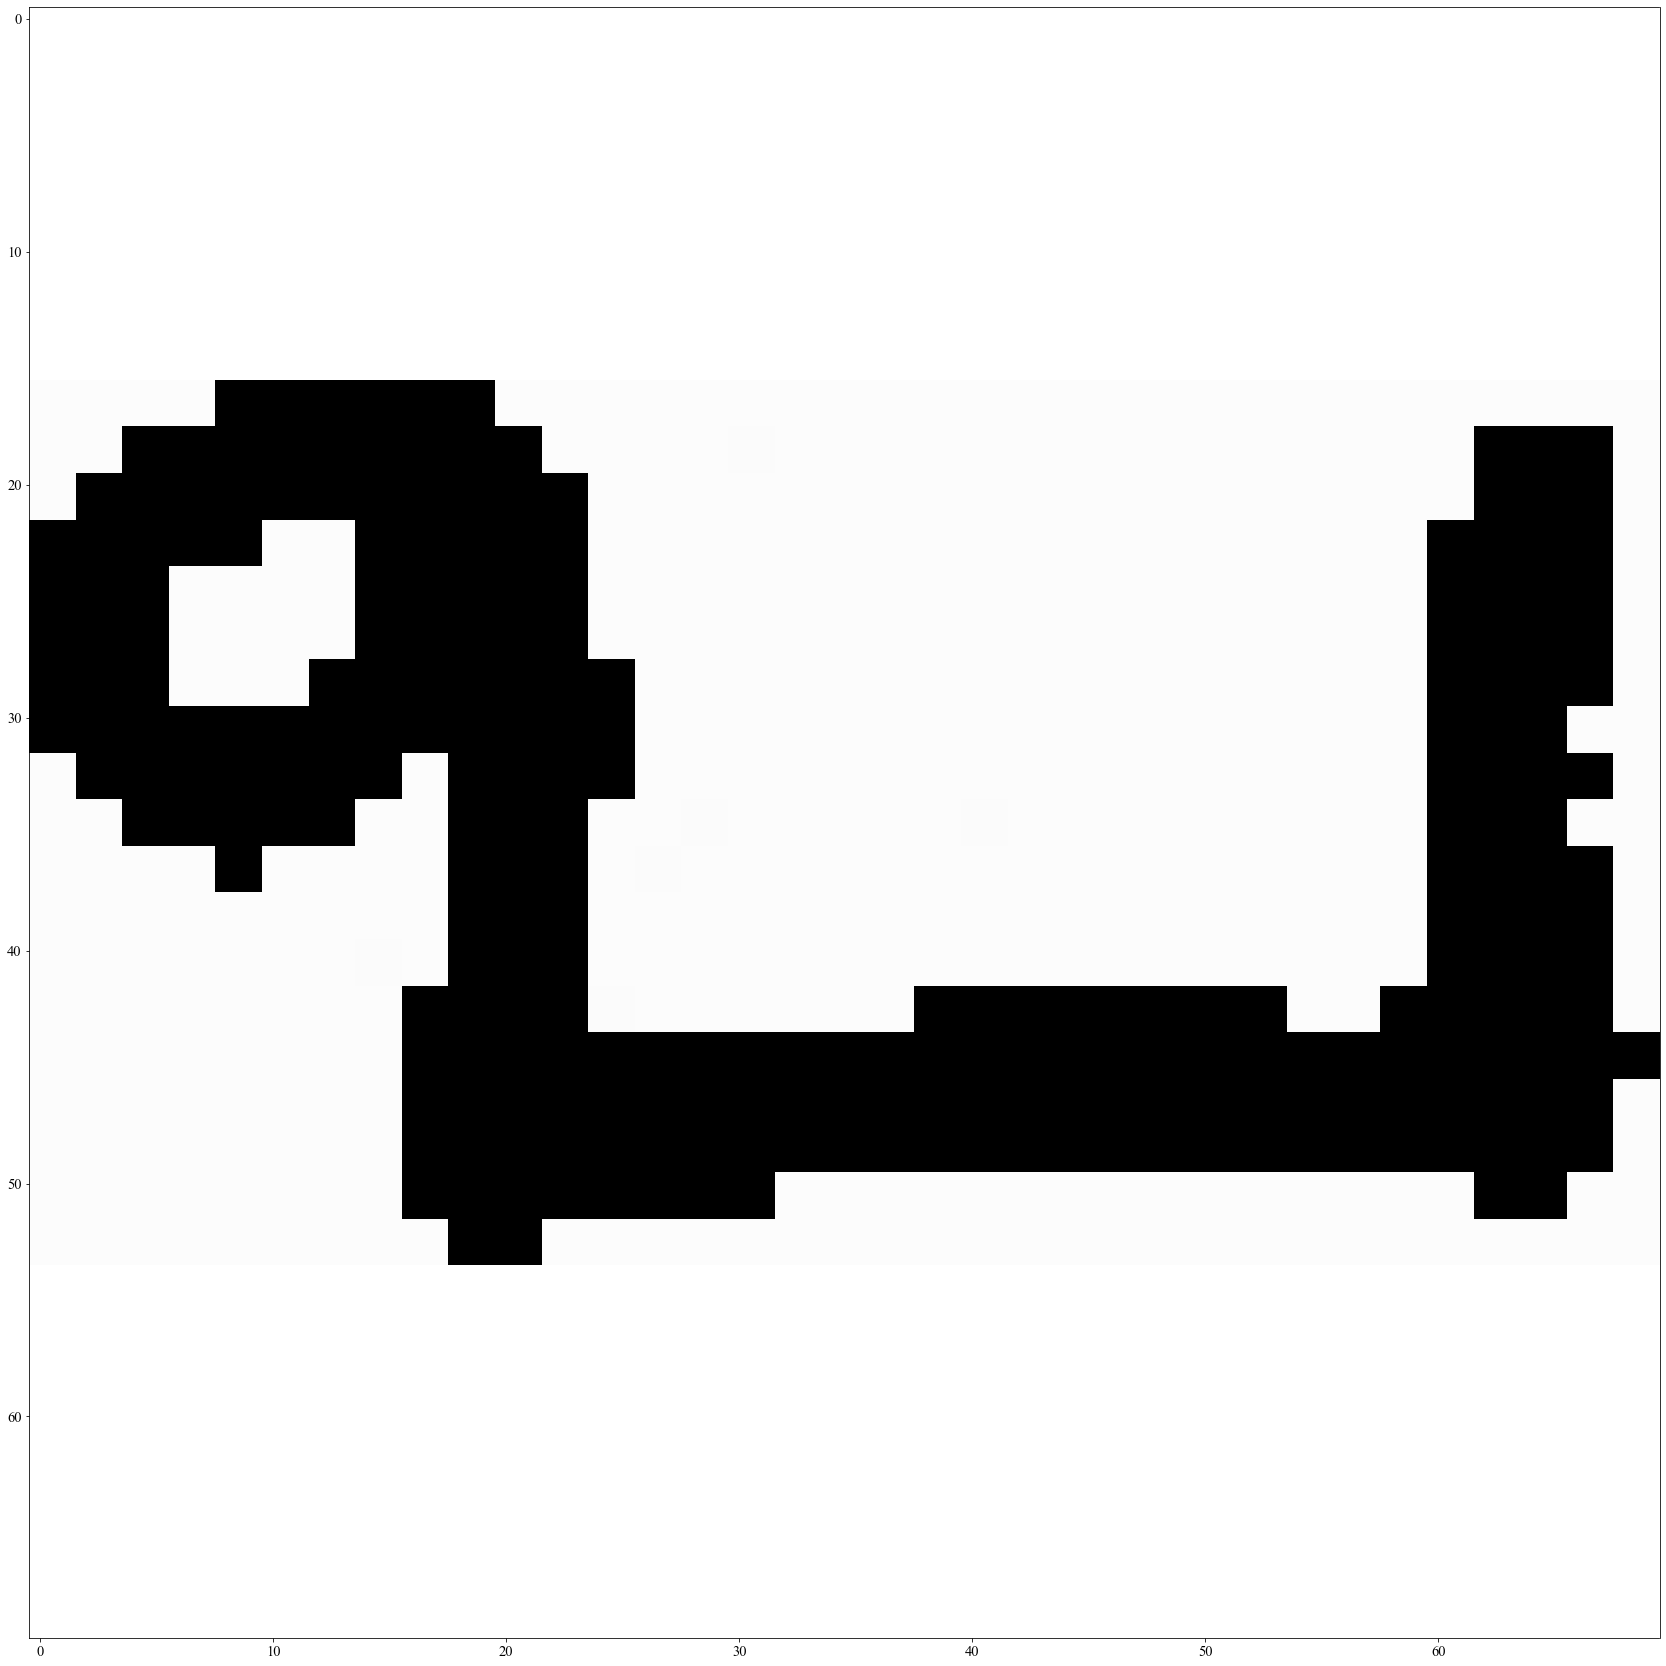

In [53]:
plt.imshow(X_train_reshape[0], cmap='gray')

## Neural Net Sequential Model Architecture

In [61]:
# Sequential model layer stacking
model = models.Sequential() # the network is a stack of layers
model.add(tf.keras.layers.Flatten(input_shape=(70,70))) # pre-processing layer, to unroll an image to an array
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # non-linearity, sigmoid has bad property to SGD (sigmoid derivative)
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(44, activation=tf.nn.softmax)) # converts output to a probability distribution

In [62]:
# list of hyperparameters
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 4900)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               627328    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 44)                5676      
Total params: 649,516
Trainable params: 649,516
Non-trainable params: 0
_________________________________________________________________


## Neural Net Training

In [63]:
# epochs: every sample from the training set to once update the weights
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy']) # cross-entropy compares 2 probability distributions (true and predicted)
history = model.fit(X_train_reshape, y_train_reshape, epochs=10, validation_data=(X_cv_reshape, y_cv_reshape))

Train on 6552 samples, validate on 1854 samples
Epoch 1/10
6552/6552 [==============================] - 1s 219us/sample - loss: 2.6576 - accuracy: 0.3010 - val_loss: 1.6085 - val_accuracy: 0.5307
Epoch 2/10
6552/6552 [==============================] - 1s 151us/sample - loss: 1.1922 - accuracy: 0.6538 - val_loss: 1.1452 - val_accuracy: 0.6472
Epoch 3/10
6552/6552 [==============================] - 1s 153us/sample - loss: 0.8433 - accuracy: 0.7402 - val_loss: 0.8491 - val_accuracy: 0.7460
Epoch 4/10
6552/6552 [==============================] - 1s 156us/sample - loss: 0.6789 - accuracy: 0.7798 - val_loss: 0.8139 - val_accuracy: 0.7470
Epoch 5/10
6552/6552 [==============================] - 1s 157us/sample - loss: 0.5518 - accuracy: 0.8272 - val_loss: 0.7332 - val_accuracy: 0.7589
Epoch 6/10
6552/6552 [==============================] - 1s 157us/sample - loss: 0.4638 - accuracy: 0.8533 - val_loss: 0.6430 - val_accuracy: 0.7977
Epoch 7/10
6552/6552 [==============================] - 1s 150us

## Neural Net Evaluation Plot

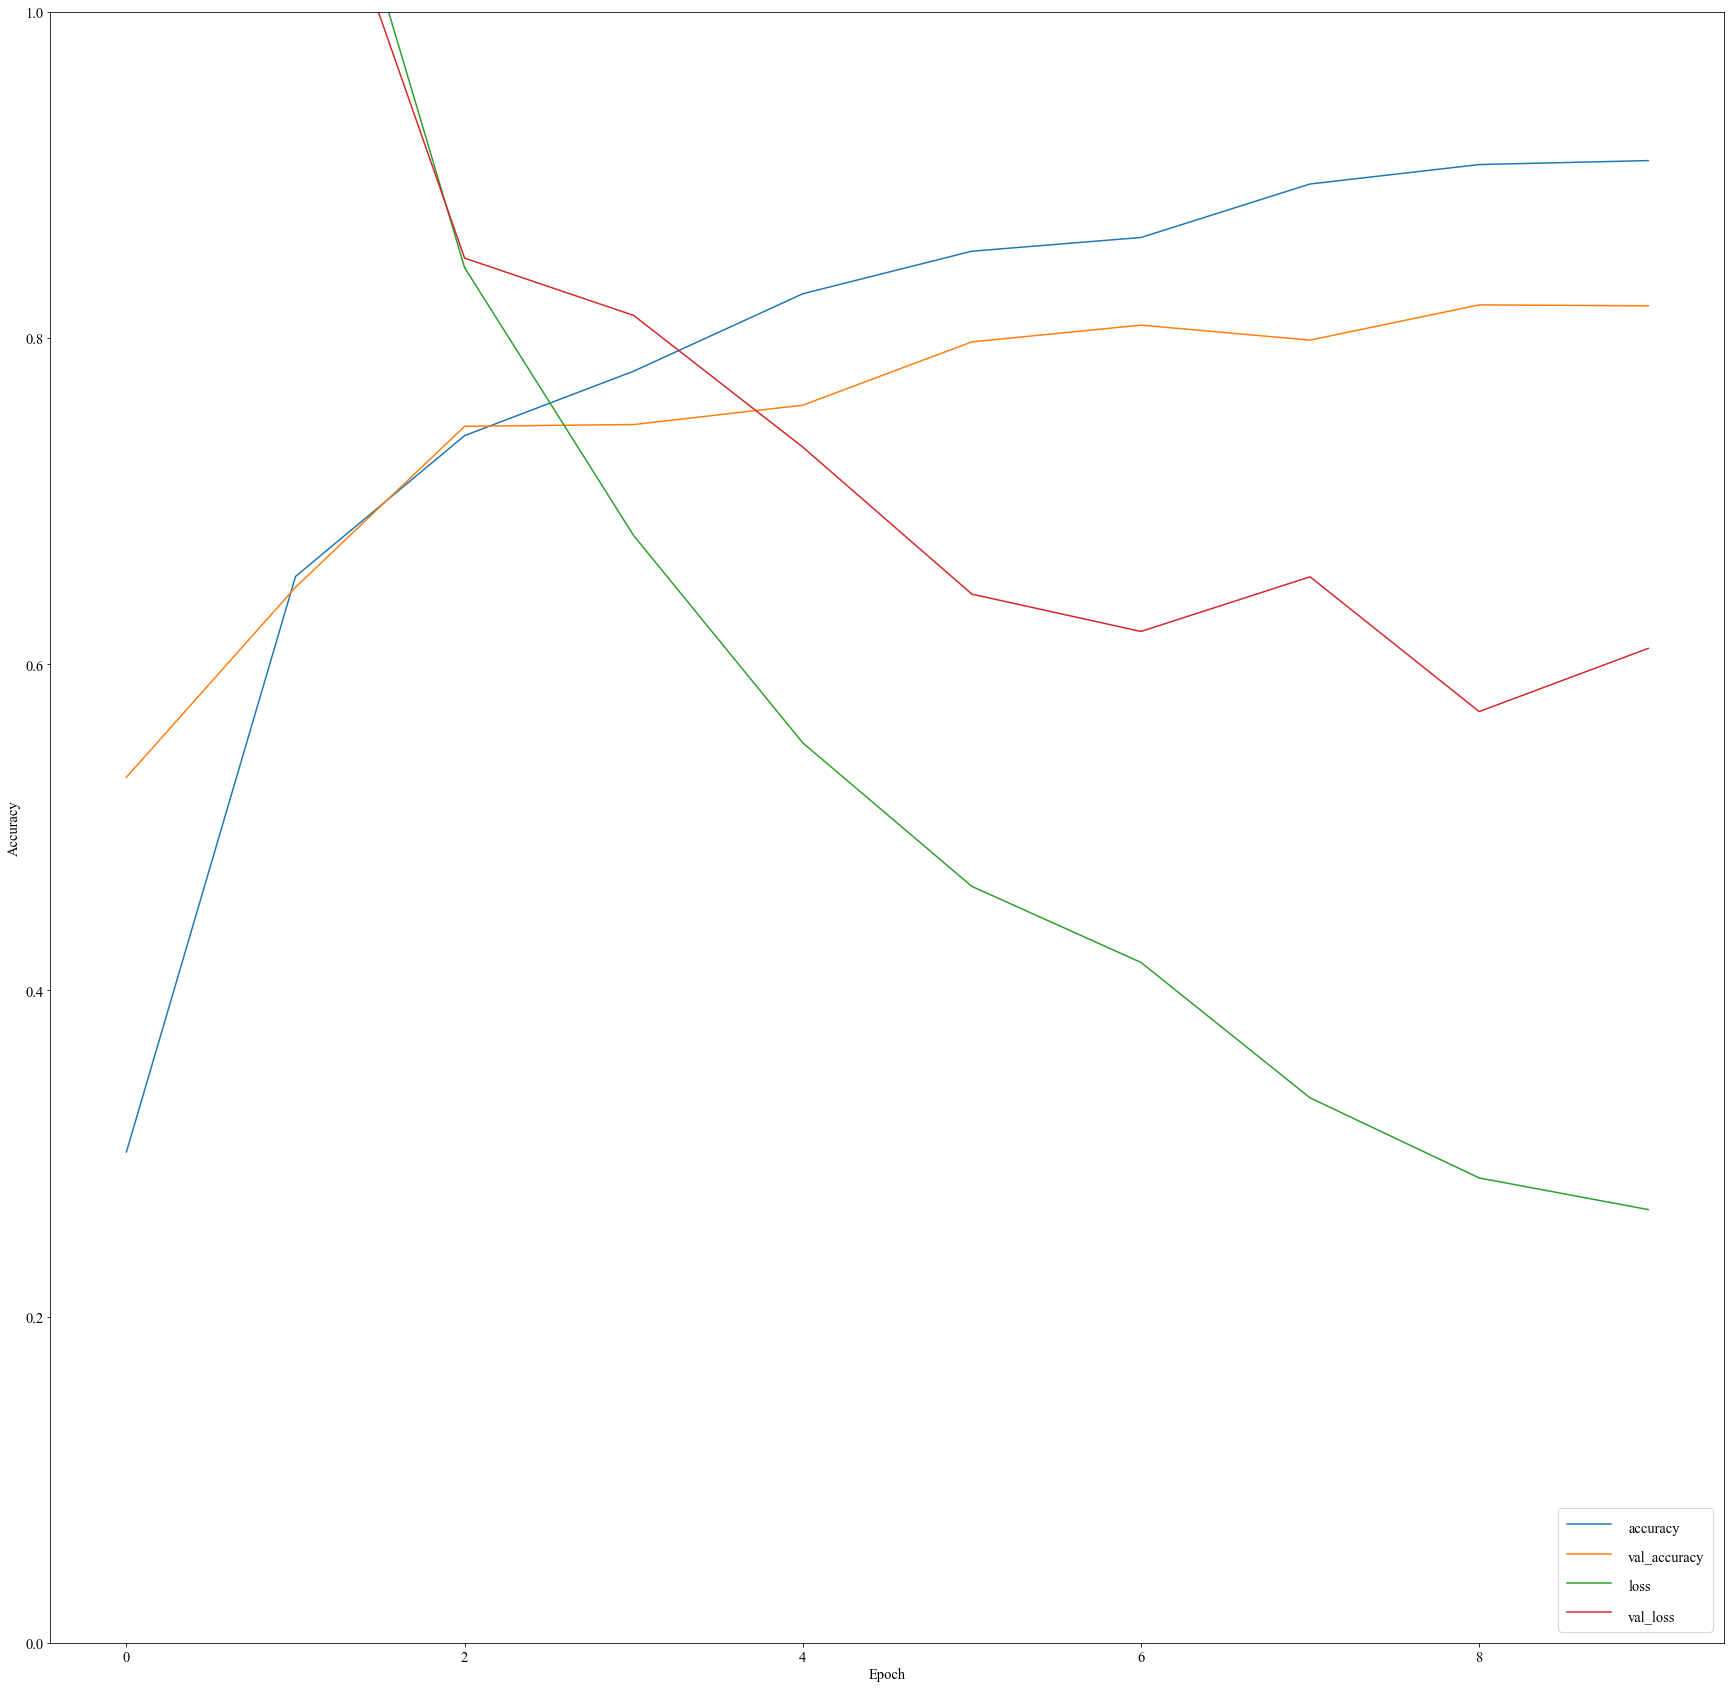

1854/1854 [==============================] - 0s 117us/sample - loss: 0.6098 - accuracy: 0.8198
0.609780643300074 0.8198489546775818


In [65]:
# trying to get a high accuracy on the validation set
# plot accuracy of training set and validation set overtime
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show();
val_loss, val_acc = model.evaluate(X_cv_reshape, y_cv_reshape)
print(f'{val_loss} {val_acc}')

In [66]:
# save model for later use
model.save('nn.model')

INFO:tensorflow:Assets written to: nn.model\assets


## Neural Net Prediction

In [67]:
# load model
nn_model = tf.keras.models.load_model('nn.model')
y_pred_nn_prob = nn_model.predict(X_test_reshape)
y_pred_nn_classes = nn_model.predict_classes(X_test_reshape) # output as one-hot array / probability distributions

In [68]:
weights = nn_model.layers[1].get_weights()
weights[0].shape

(4900, 128)

In [122]:
print(y_pred_nn_prob[0])
print(np.argmax(y_pred_nn_prob[0])) # find the highest probability of a particular class
print(y_test_reshape[0])

[1.40784914e-06 8.09035464e-06 4.30628660e-07 1.43377401e-05
 2.43215560e-04 1.16751853e-08 1.93542255e-05 9.84216708e-09
 8.15081512e-06 4.37164962e-01 1.29343979e-02 1.16662488e-06
 2.24809264e-05 1.75170915e-03 1.51988047e-06 8.28411203e-07
 7.24620213e-06 4.50030711e-06 1.07508140e-06 1.83951091e-02
 4.27698269e-02 2.12923278e-05 1.61021482e-04 7.50561449e-05
 3.47215069e-11 2.84191832e-12 1.27333976e-06 3.05625406e-07
 1.05302740e-06 2.95605957e-07 1.90073486e-08 2.06624391e-05
 2.20667373e-09 1.15778995e-08 5.82193707e-06 6.51482196e-06
 1.42972267e-09 4.98712156e-03 8.08391196e-05 3.89558566e-03
 1.09436871e-06 2.42134538e-02 2.45040956e-05 4.53154266e-01]
43
[43]


[43  5 12 19  5 43 15 25  0 40  7  8 36 10 39 40  7 19 31 25 42 41 13 26
 36  7 21 43  2 33 25 15 13 14 24  3 33 37 15  7  6 38  0 31  0 26 43 27
 18 21 18  8  9 40 35  3  3 38 33 36 29  7  4 24  1  3 29  4 33  5  0 37
  6 37 27 20  4 40 13 31  0  2 26 14 28  4  5  2 36 41 15 28  1 15 28 11
 29 40  7  0 27  4  0 33 10  4 14 36 27 32 42 33  8 35 11  3  7 29 30 42
 37 24 17 10 21  2  6 34 34 26 23 10 40 36 32 27 38 39  2  0 33 41 10 17
 23  2  2 19 26  1 19 41  1 24  2 22 27 28 21 29 17  4 35 19  7  9  2 34
 16 36  4 31 11 12 17 18 16 19 30 33 40  4 43 36 15 33 31 30  2 39  0  8
 16 42 16 21 18 29 16 31  9 39 13 34 12  7  8 24 11  1 42  9 14 25  4  8
 29  3 31 42 10 35  4  4 41 12  1 33 29 29 32 27 28 41 22 10 20 28  8 10
  6 13 24 36 15 31 32  0 14 16 34 24  9 41 37 27 18 33 37 18  2 27 28 18
 14 11 29 19 19 15 40 26 14 41 18 25 19 35  0  0 19 42 12  2  8 41 40 25
 16 35  4 42 17 37 25 21 42 26 31 18 36 31 39  2 21  2 25 18 11 17 23 16
 10 13 34 42  9 30  4 42 21  0 40  6 19 13  7 31 31

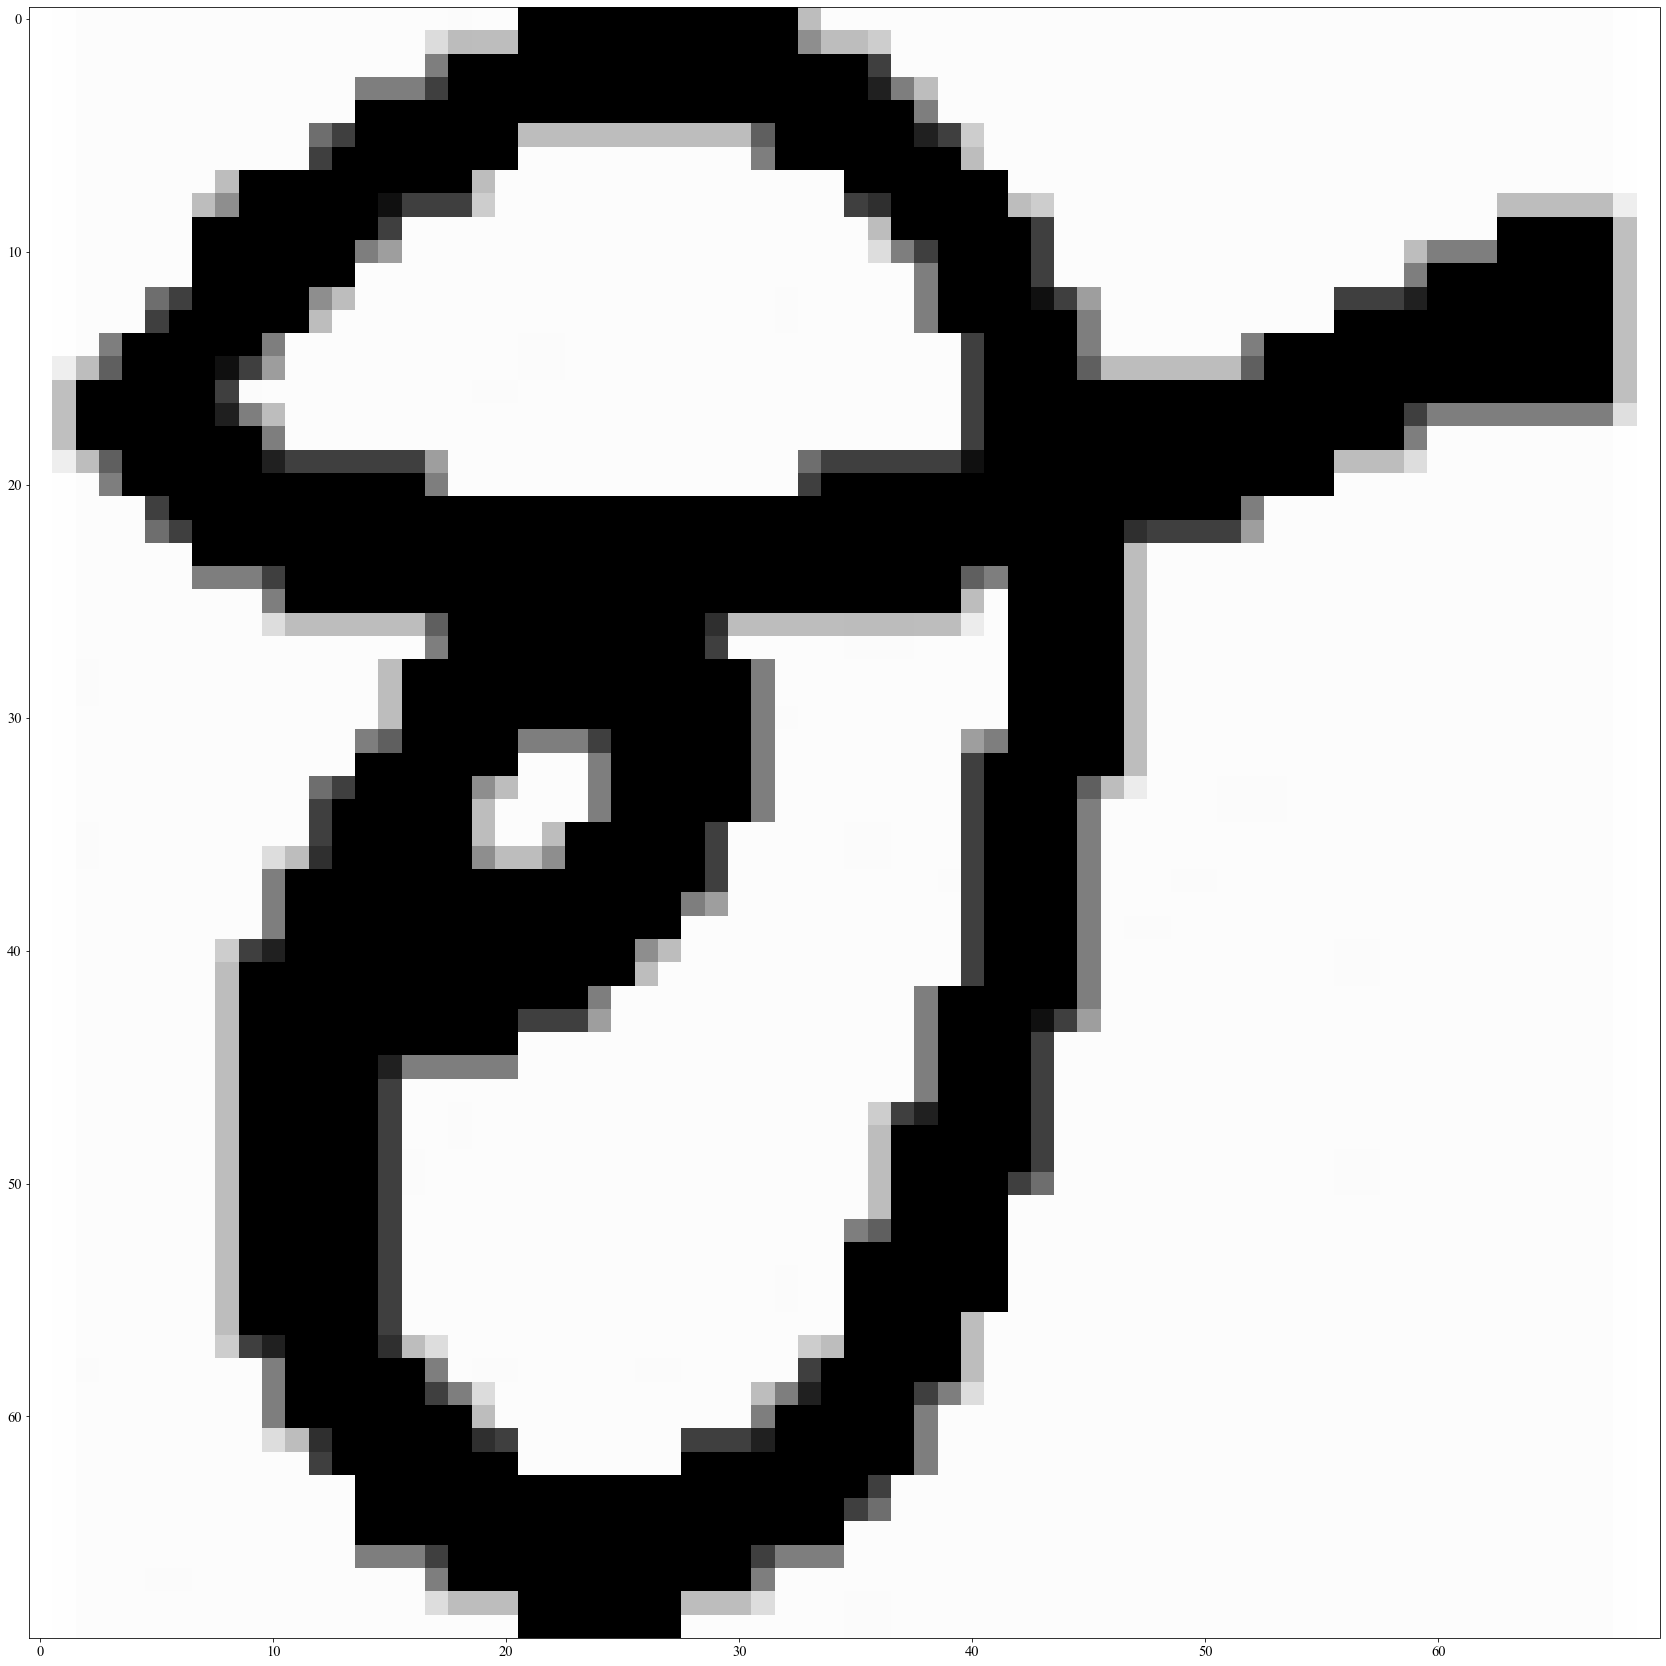

In [70]:
print(y_pred_nn_classes) # from predict classes
print(y_test_reshape.flatten()) # y test labels
plt.imshow(X_test_reshape[0], cmap='gray')

## Neural Net Confusion Matrix

(<Figure size 2160x2160 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

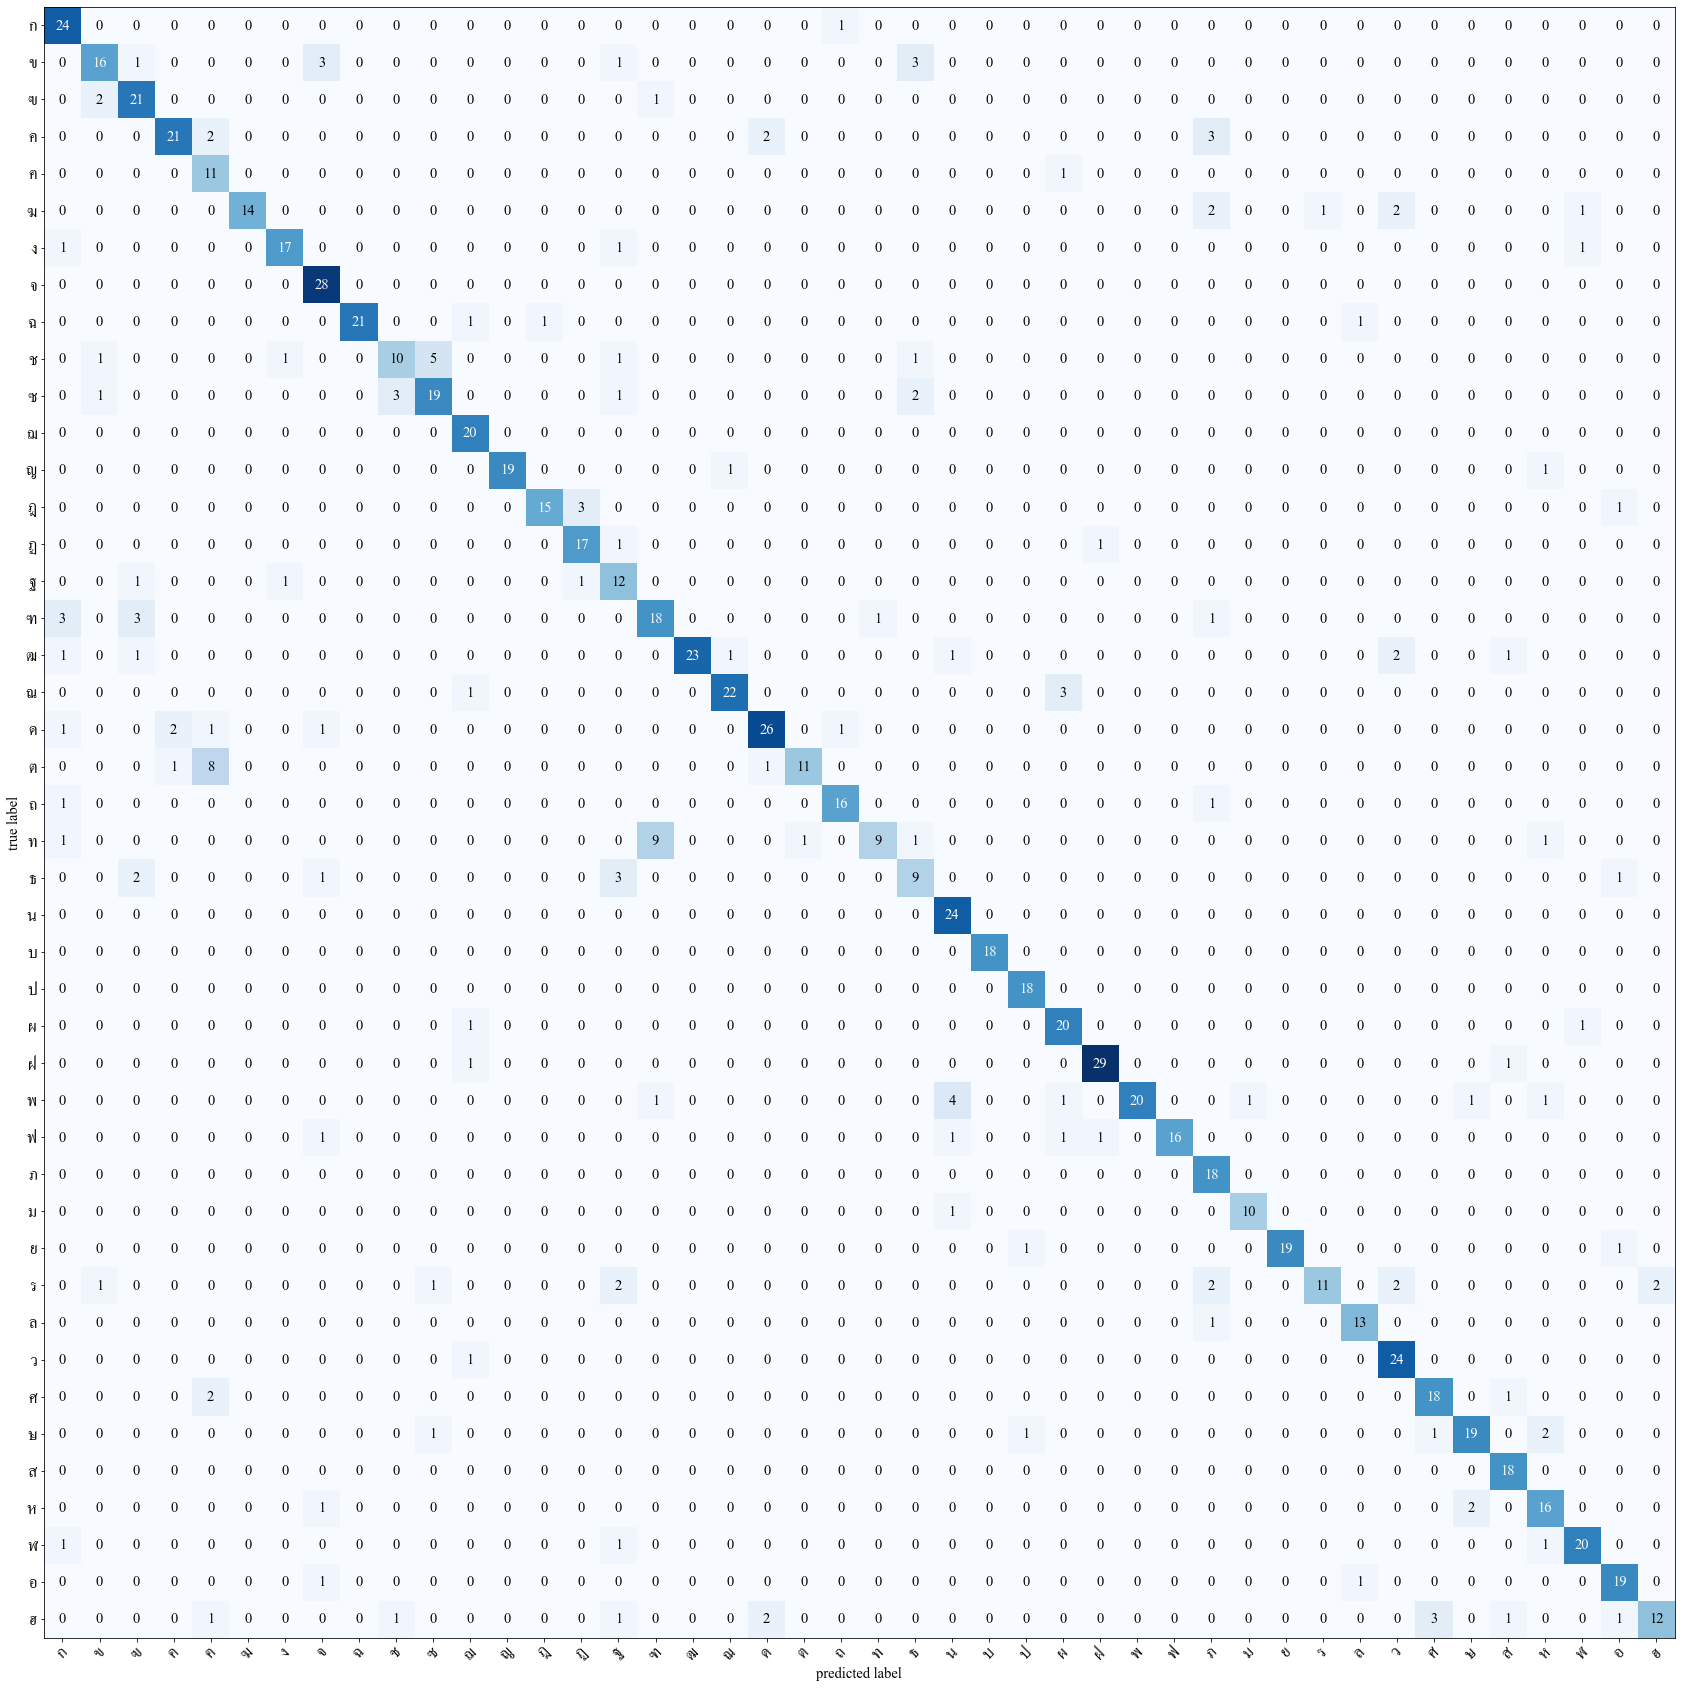

In [71]:
cm_nn = confusion_matrix(y_test_reshape, y_pred_nn_classes)
pcm(conf_mat=cm_nn, class_names=labels.values())

## Convolutional Neural Net

## Data Transformation to 4D with 1D tensor element

In [72]:
# Reshape to tensor element (4D)
X_train_reshape_4D = X_train_reshape.reshape(len(X_train_reshape), 70, 70, 1)
X_cv_reshape_4D = X_cv_reshape.reshape(len(X_cv_reshape), 70, 70, 1)
X_test_reshape_4D = X_test_reshape.reshape(len(X_test_reshape), 70, 70, 1)
print(X_train_reshape_4D.shape)
print(X_cv_reshape_4D.shape)
print(X_test_reshape_4D.shape)

(6552, 70, 70, 1)
(1854, 70, 70, 1)
(955, 70, 70, 1)


## Convolutional Neural Net Sequential Model Architecture

In [109]:
# CNN
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(70, 70, 1))) # convolves along the image, much efficient than Dense layer, gets an activation map
cnn_model.add(layers.MaxPooling2D((2, 2))) # max pooling of 2x2 window, reduce the width and height of the image, to save computational power
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Flatten()) # flat from 2D to 1D before feed to Dense
cnn_model.add(layers.Dropout(0.5)) # drop-out
cnn_model.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
cnn_model.add(tf.keras.layers.Dense(44, activation=tf.nn.softmax)) # number of our classes (ก-ช, 10 consonants, in this case)

In [110]:
# list of hyperparameters
cnn_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 68, 68, 32)        320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16384)             0         
_________________________________________________________________
dense_43 (Dense)             (None, 1024)            

## CNN Training

In [111]:
# epochs: every sample from the training set to once update the weights
cnn_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy']) # cross-entropy compares 2 probability distributions (true and predicted)
cnn_history = cnn_model.fit(X_train_reshape_4D, y_train_reshape, epochs=20, validation_data=(X_cv_reshape_4D, y_cv_reshape))

Train on 6552 samples, validate on 1854 samples
Epoch 1/20
6552/6552 [==============================] - 4s 659us/sample - loss: 3.6113 - accuracy: 0.2126 - val_loss: 3.5098 - val_accuracy: 0.3134
Epoch 2/20
6552/6552 [==============================] - 4s 572us/sample - loss: 3.4755 - accuracy: 0.3469 - val_loss: 3.4749 - val_accuracy: 0.3474
Epoch 3/20
6552/6552 [==============================] - 4s 572us/sample - loss: 3.4526 - accuracy: 0.3695 - val_loss: 3.4577 - val_accuracy: 0.3652
Epoch 4/20
6552/6552 [==============================] - 4s 572us/sample - loss: 3.4216 - accuracy: 0.4008 - val_loss: 3.4256 - val_accuracy: 0.3959
Epoch 5/20
6552/6552 [==============================] - 4s 572us/sample - loss: 3.4023 - accuracy: 0.4190 - val_loss: 3.4025 - val_accuracy: 0.4213
Epoch 6/20
6552/6552 [==============================] - 4s 571us/sample - loss: 3.3607 - accuracy: 0.4620 - val_loss: 3.3733 - val_accuracy: 0.4471
Epoch 7/20
6552/6552 [==============================] - 4s 572us

## CNN Evaluation Plot

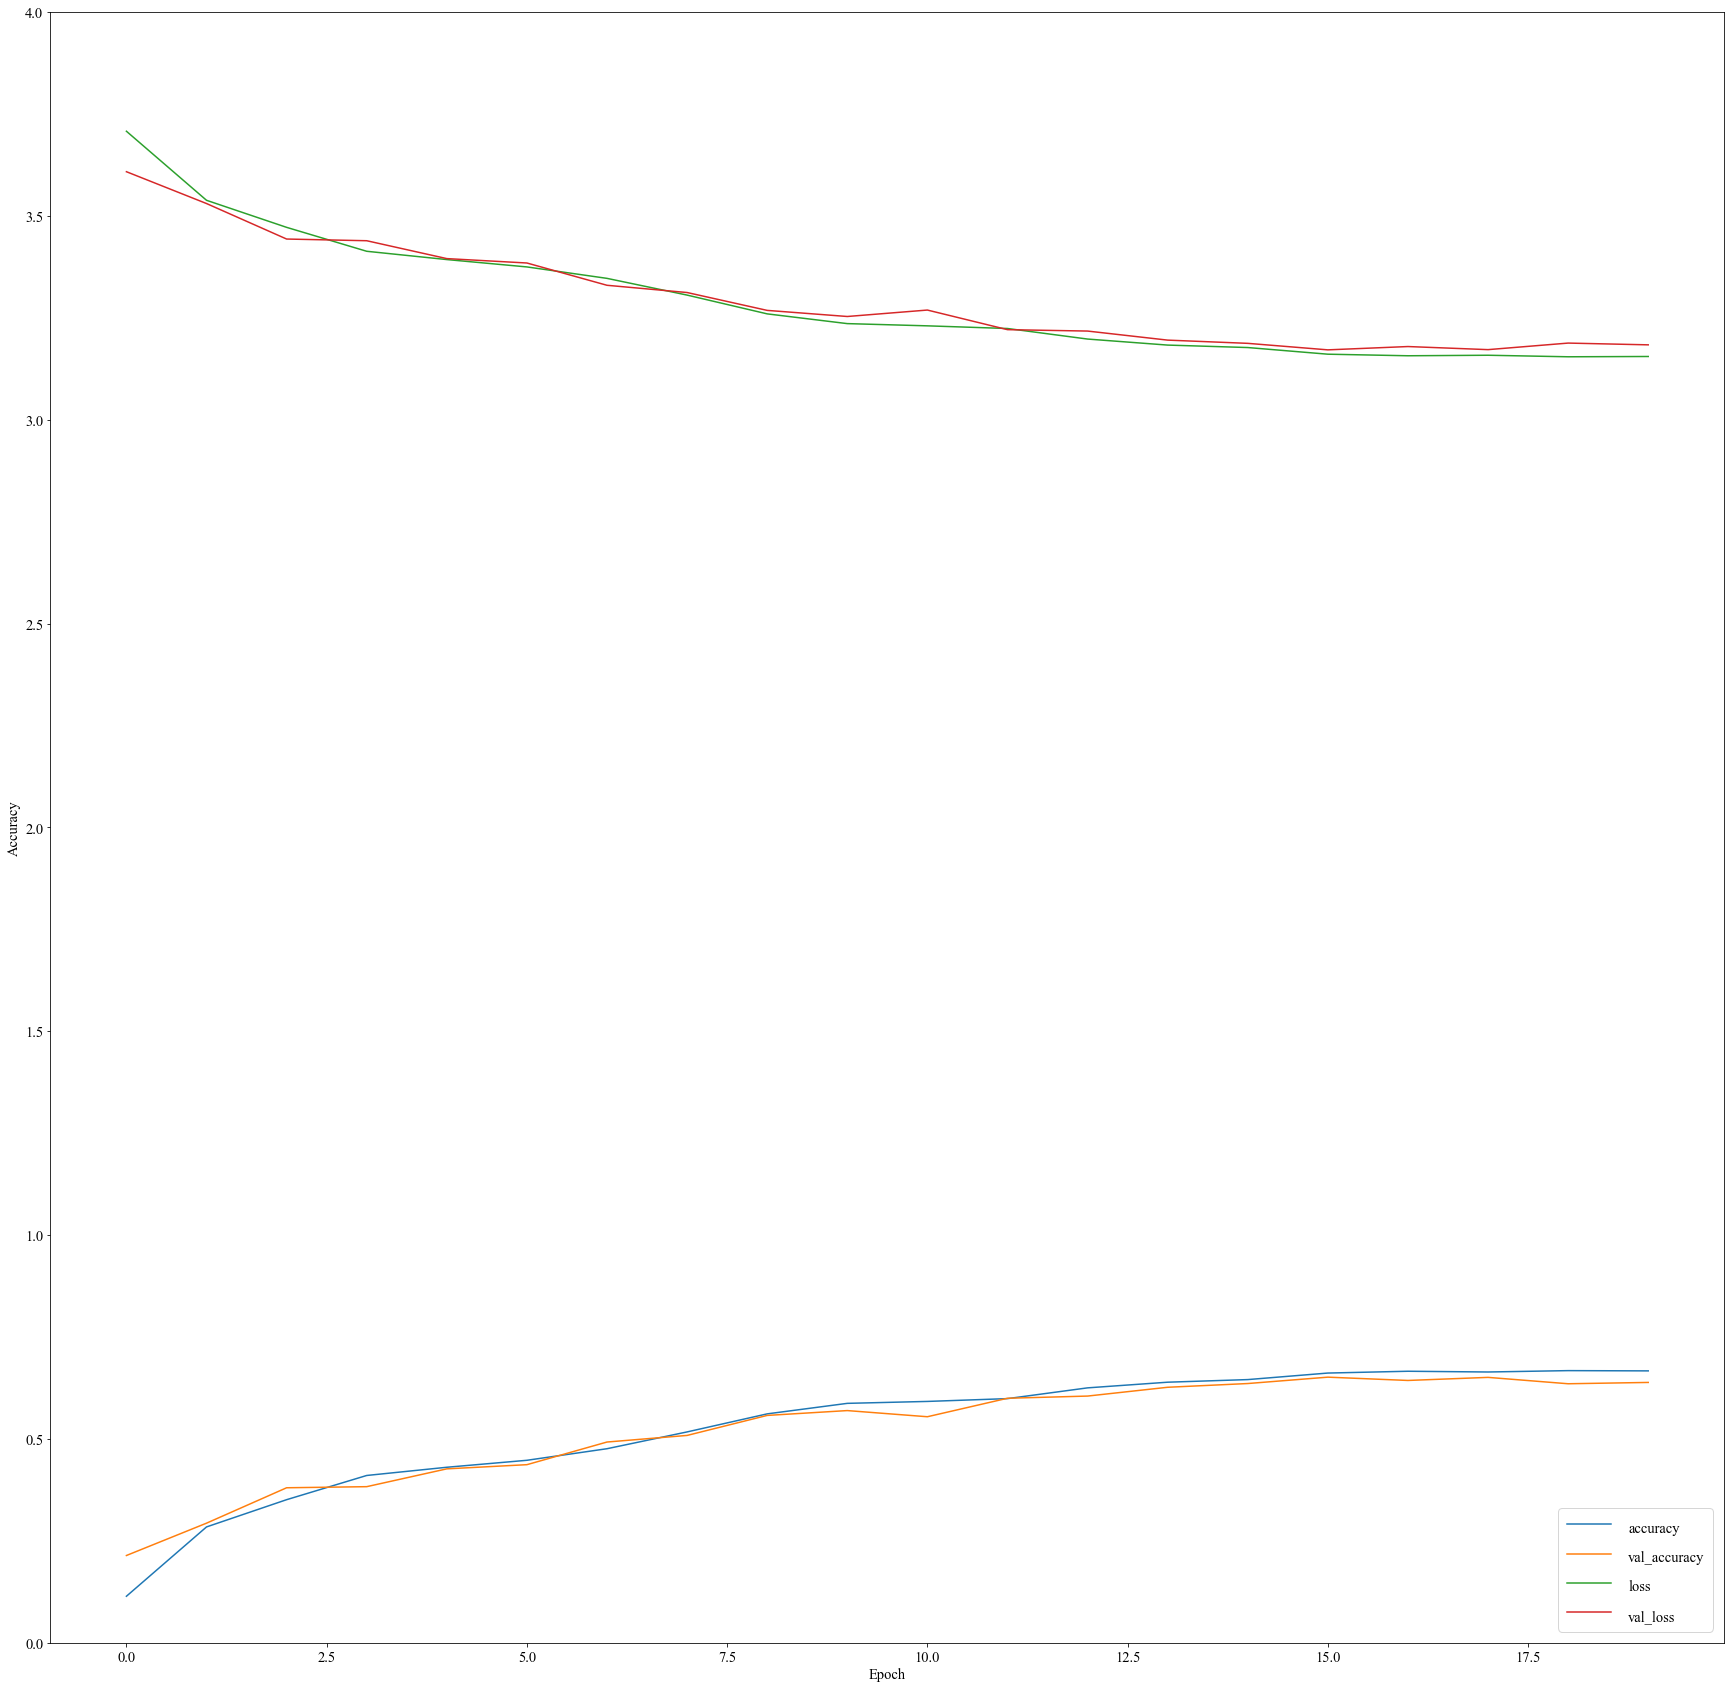

1854/1854 [==============================] - 1s 471us/sample - loss: 3.1836 - accuracy: 0.6386
3.183610739702803 0.6386191844940186


In [102]:
# trying to get a high accuracy on the validation set
# plot accuracy of training set and validation set overtime
plt.plot(cnn_history.history['accuracy'], label='accuracy')
plt.plot(cnn_history.history['val_accuracy'], label = 'val_accuracy')
plt.plot(cnn_history.history['loss'], label='loss')
plt.plot(cnn_history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 4])
plt.legend(loc='lower right')
plt.show();
cnn_val_loss, cnn_val_acc = cnn_model.evaluate(X_cv_reshape_4D, y_cv_reshape)
print(f'{cnn_val_loss} {cnn_val_acc}')

In [100]:
# save model for later use
cnn_model.save('cnns.model')

INFO:tensorflow:Assets written to: cnns.model\assets


## CNN Prediction

In [101]:
# load model
cnn_model = tf.keras.models.load_model('cnns.model')
y_pred_cnn_prob = cnn_model.predict(X_test_reshape_4D)
y_pred_cnn_classes = cnn_model.predict_classes(X_test_reshape_4D) # output as one-hot array / probability distributions

In [103]:
cnn_weights = cnn_model.layers[0].get_weights()
cnn_weights[0].shape

(3, 3, 1, 32)

In [104]:
print(y_pred_cnn_prob[0])
print(np.argmax(y_pred_cnn_prob[0])) # find the highest probability of a particular class

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 6.4693978e-33
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0264505e-32 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]
43


[43 25 12 19 27 43 15 25  0 40  7 17 36 23 37 12  7 19 19 25 36 41 14 26
 36  7 19 43  2  2 25 12 40 14 17  3  2 43 23  7  6 24  0  3  0 26 43 20
 12  3 18 24  9 40 35  3  3 25 43 36 24  9 19 30  2  3 24 43 27  2  0 37
  6 37 27 20  4 40 14  0  0 40 43 14 30  4 32  2 17 41 23 30 12 15 27 11
 24 40  7 25 27  4  0 43  9  4 14 36 27 32 43 43 12 35 11  3  7 24 30 35
 37 24 17  9 19  2  9 23 43 26 23  9 40 17 32 27 41 39  2  0  2 41 16 17
 23  2  2 19 26 23 19 41 43 24  2 16 27 43  3 24 17  4 35 19  7  9  4 23
 16 36  3 27 27 12 17 18 16 19 30  2 40 37 43 36  6 43  0 30  2 43  0 18
 40 43 16 19 18 32 16 14  9 39 14 23 12  7 25 24 11 23  7  9 14 25 19 41
 24  3  3 43  9 35  4  3 41 12  2 25 24 24 24 27 26 23 16 12 19 26 24  9
  6 14 30 36 15 43 32 25 14 16 25 24  9 41 37 27 18  2 41 18  2 27 27 18
 14 11 32 19 19 15 40 26 14 41 18 25 19 35  0  0 19 36 12  2  7 41 40 25
 16 19 37 35 17 37 25 19 43 26 16 18 36 32 39 23 35  2 25 18 11 17 23 16
  9 14  9  7  9 30  4 23  0  0 40  6 19 36  3  3  0

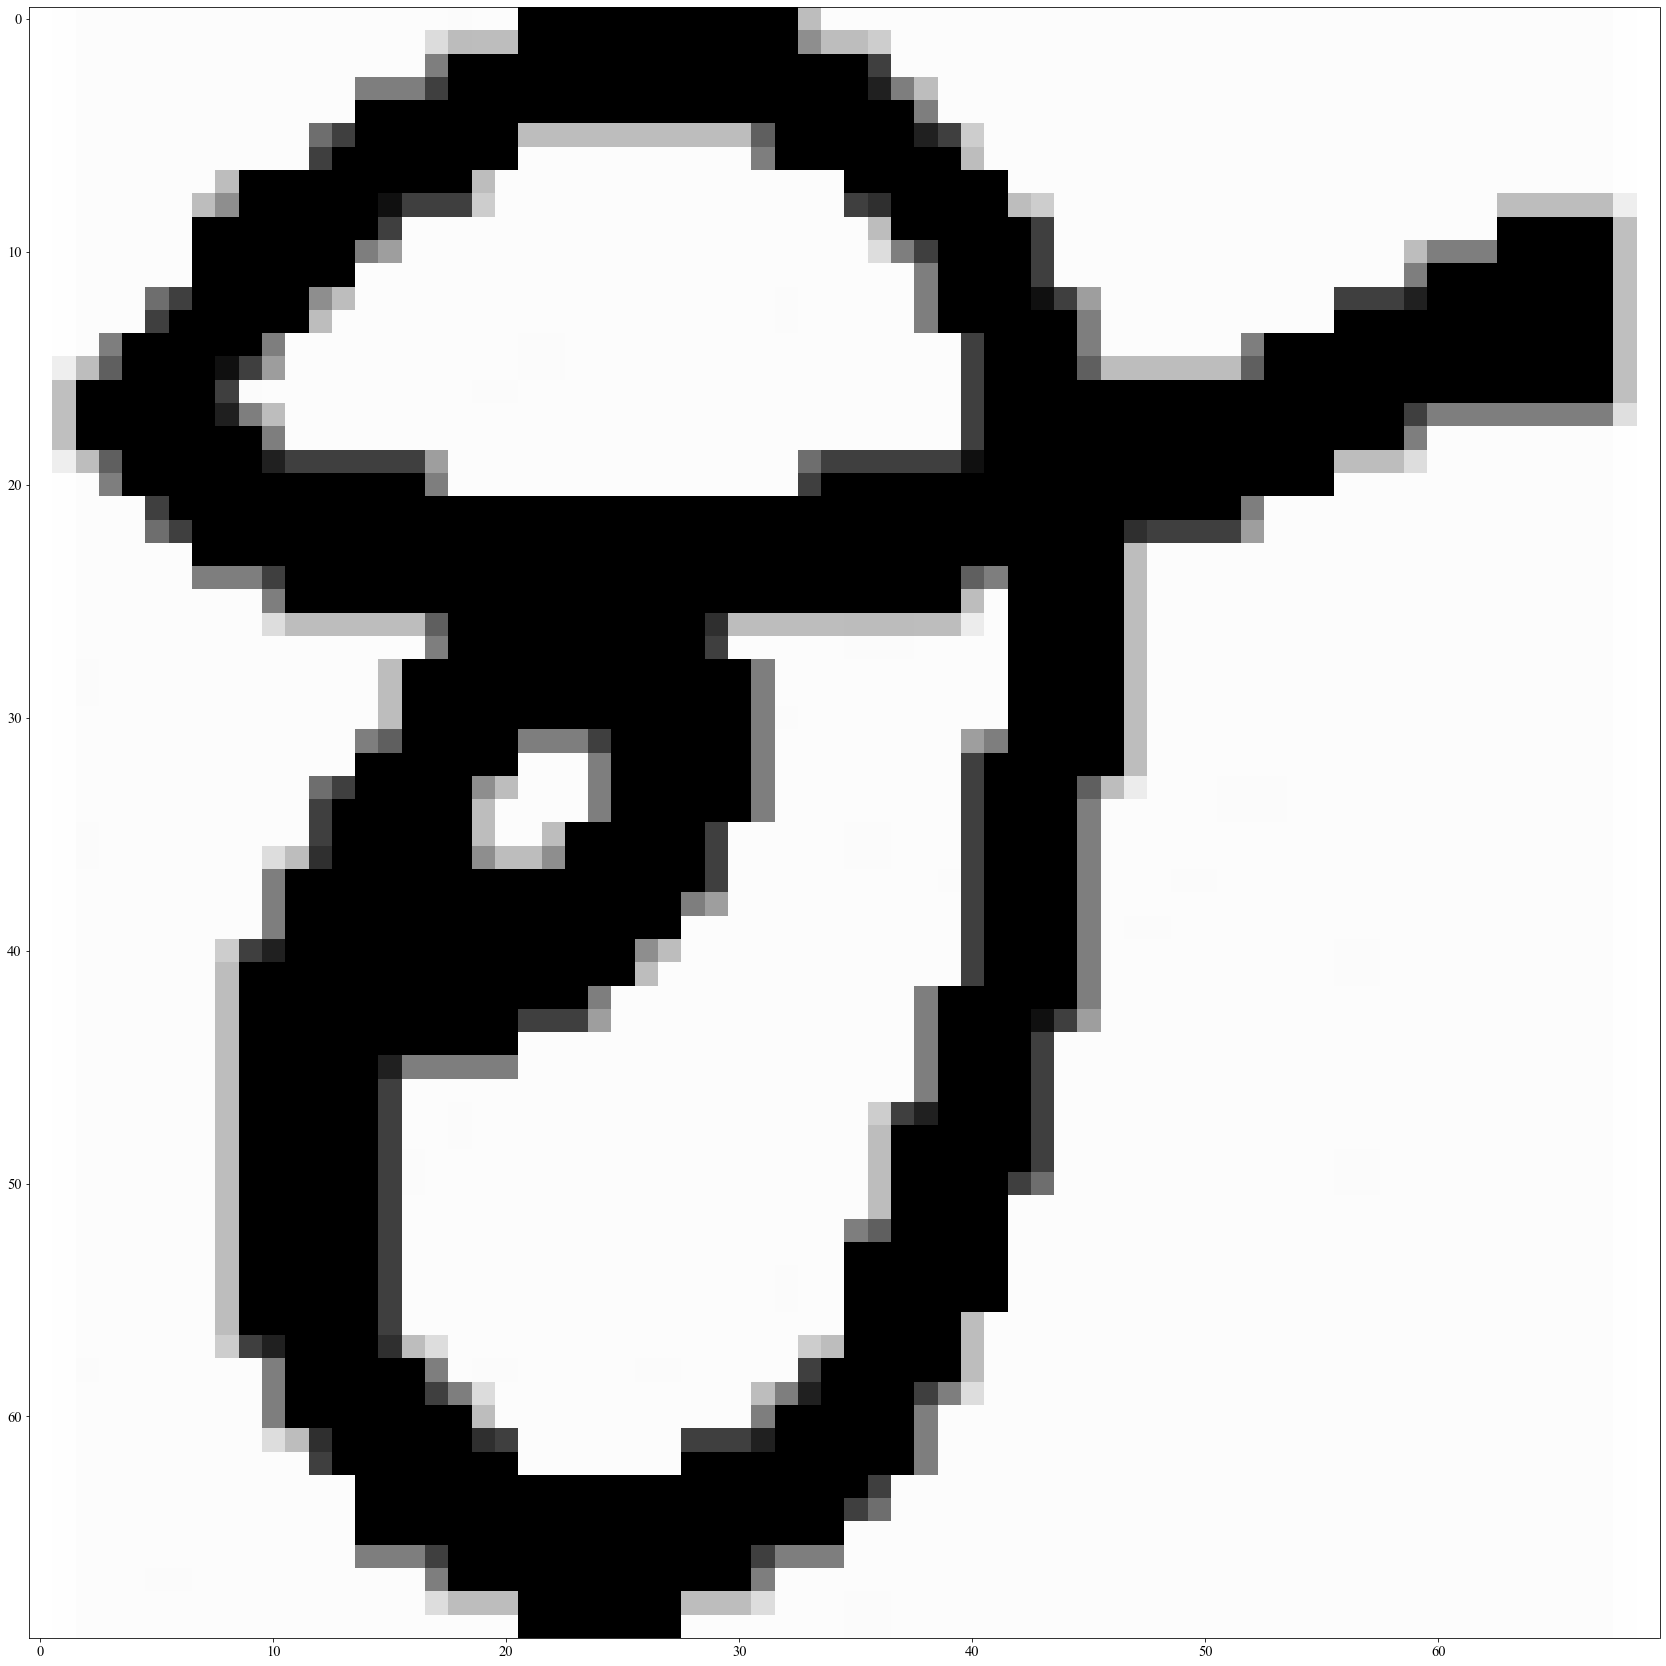

In [105]:
print(y_pred_cnn_classes) # from predict classes
print(y_test_reshape.flatten()) # y test labels
plt.imshow(X_test_reshape[0], cmap='gray')

## CNN Confusion Matrix

(<Figure size 2160x2160 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

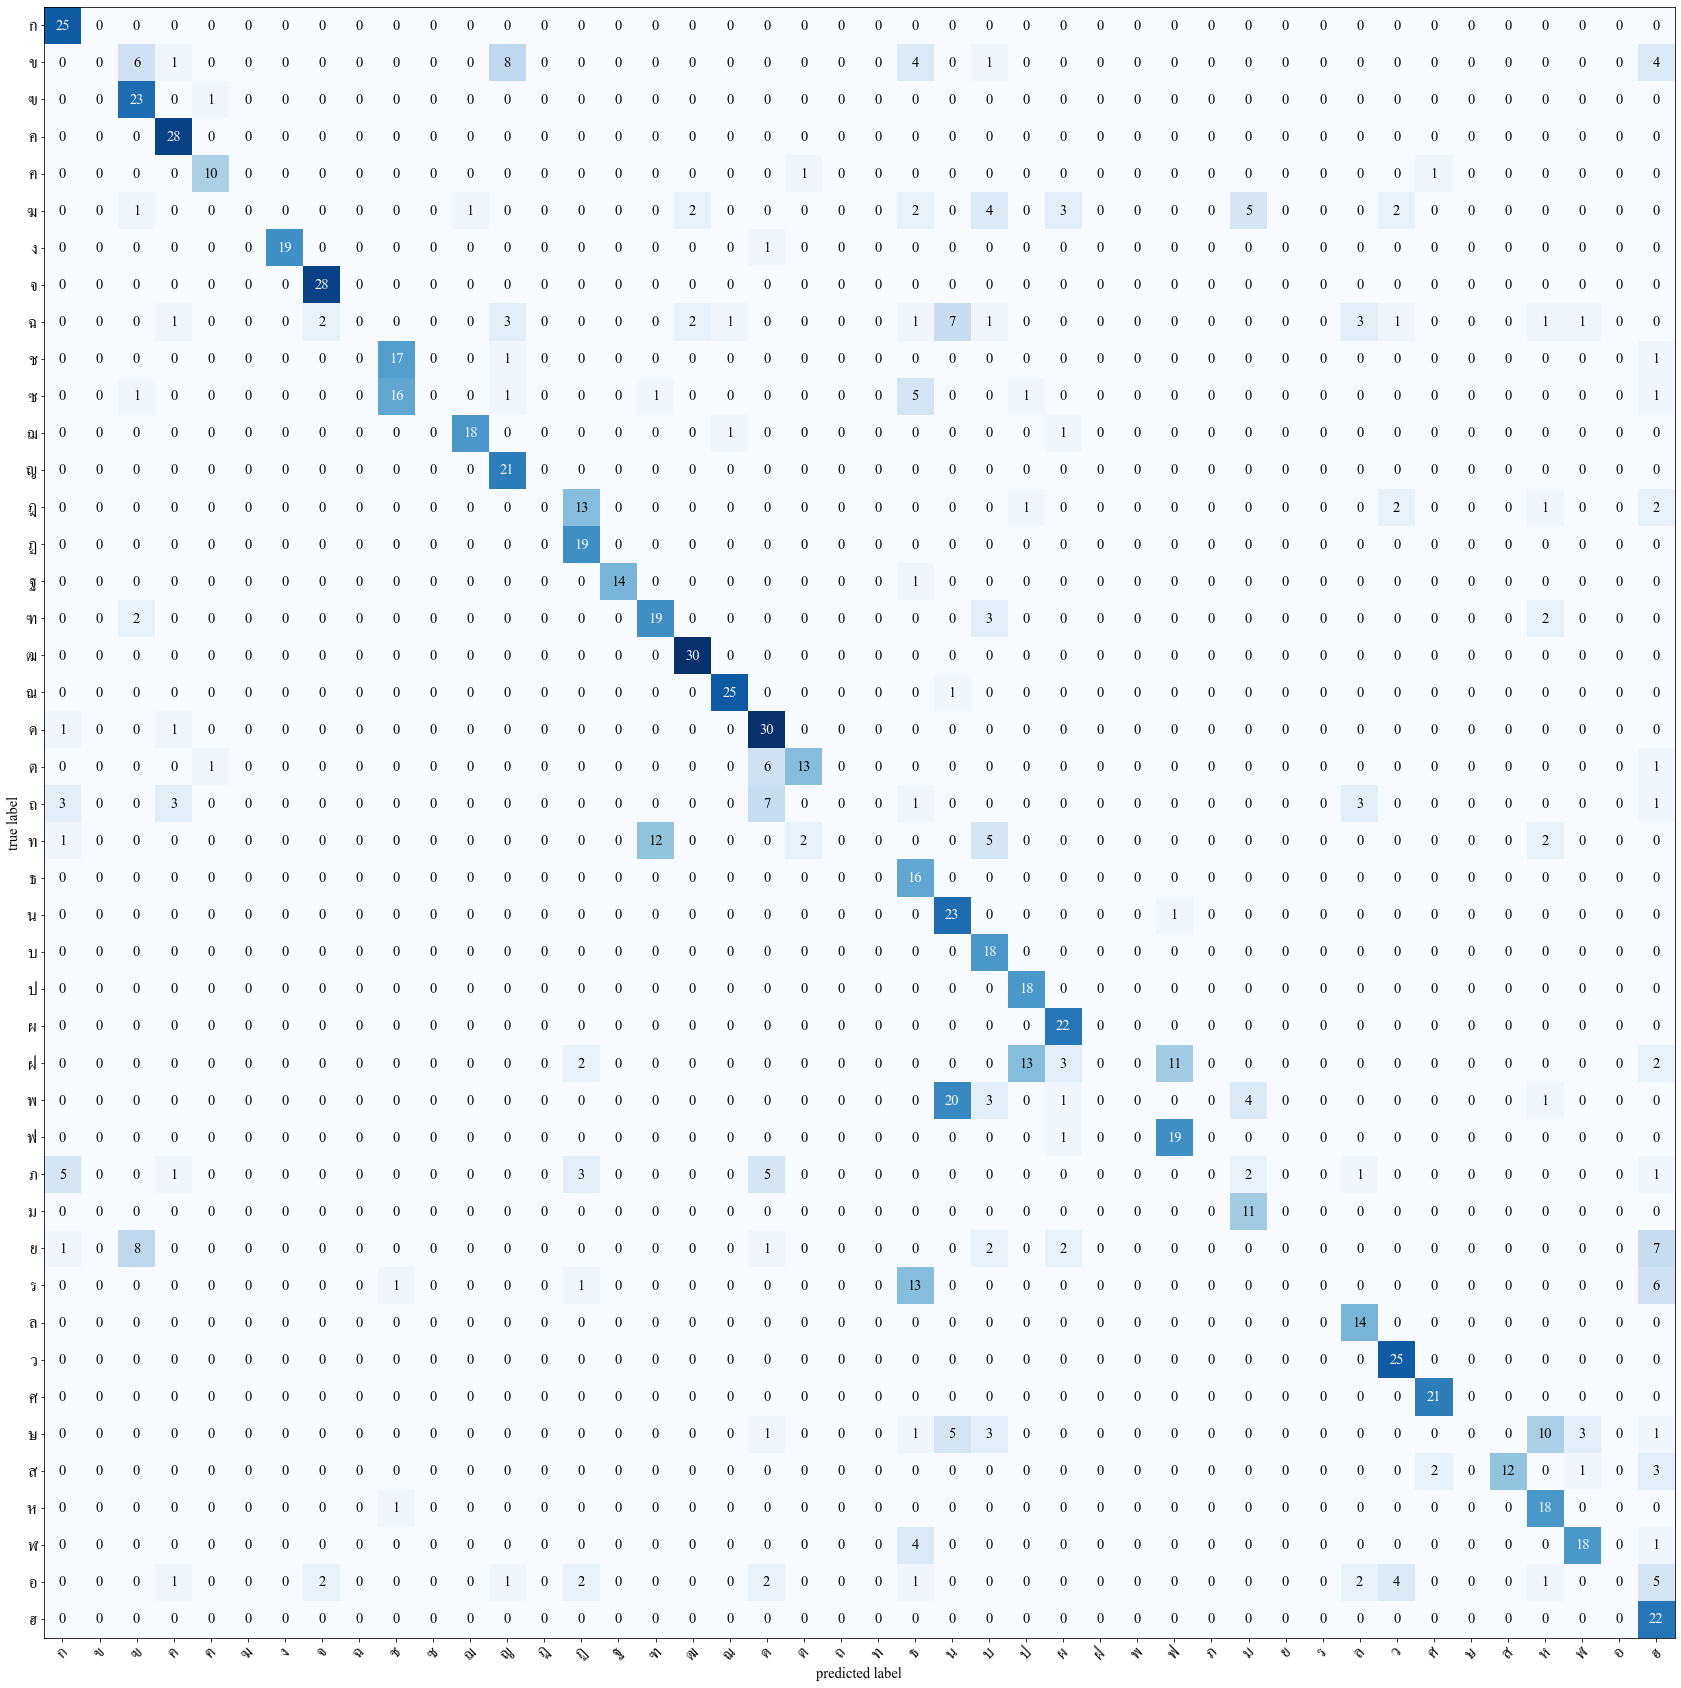

In [108]:
cm_cnn = confusion_matrix(y_test_reshape, y_pred_cnn_classes)
pcm(conf_mat=cm_cnn, class_names=labels.values())